# **1 - Introduction**

---



The introduction chapter should be filled with an identity, an overview of the dataset used, and the objective to be achieved.

Name : Andik Al Fauzi

Batch : FTDS-018-RMT

Dataset : [Dataset Churn](https://github.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-andik-alfauzi/blob/main/churn.csv)

Objective : Creating a machine learning model with Tensorflow to help service provider companies predict customers who will unsubscribe (churn) according to instructions [Milestone 1 - Phase 2](https://github.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-andik-alfauzi)

# **2 - Import Libraries**

---



The first cell in the notebook should contain and only contain all the libraries used in the project.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Dense 
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix

# Importing Libraries
import pickle

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **3 - Data Loading**

---

This section contains the data preparation process before further data exploration. The Data Loading process can include giving new names to each column, checking the size of the dataset, etc.

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Phase2-FTDS/main/Milestone/p2---ftds-018-rmt---m1-andik-alfauzi/churn.csv')

# Copy dataset to make sure the original is untouchable
churn = data.copy()

# Display
churn

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


The dataset consists of **37,010** rows of data and **22** columns.

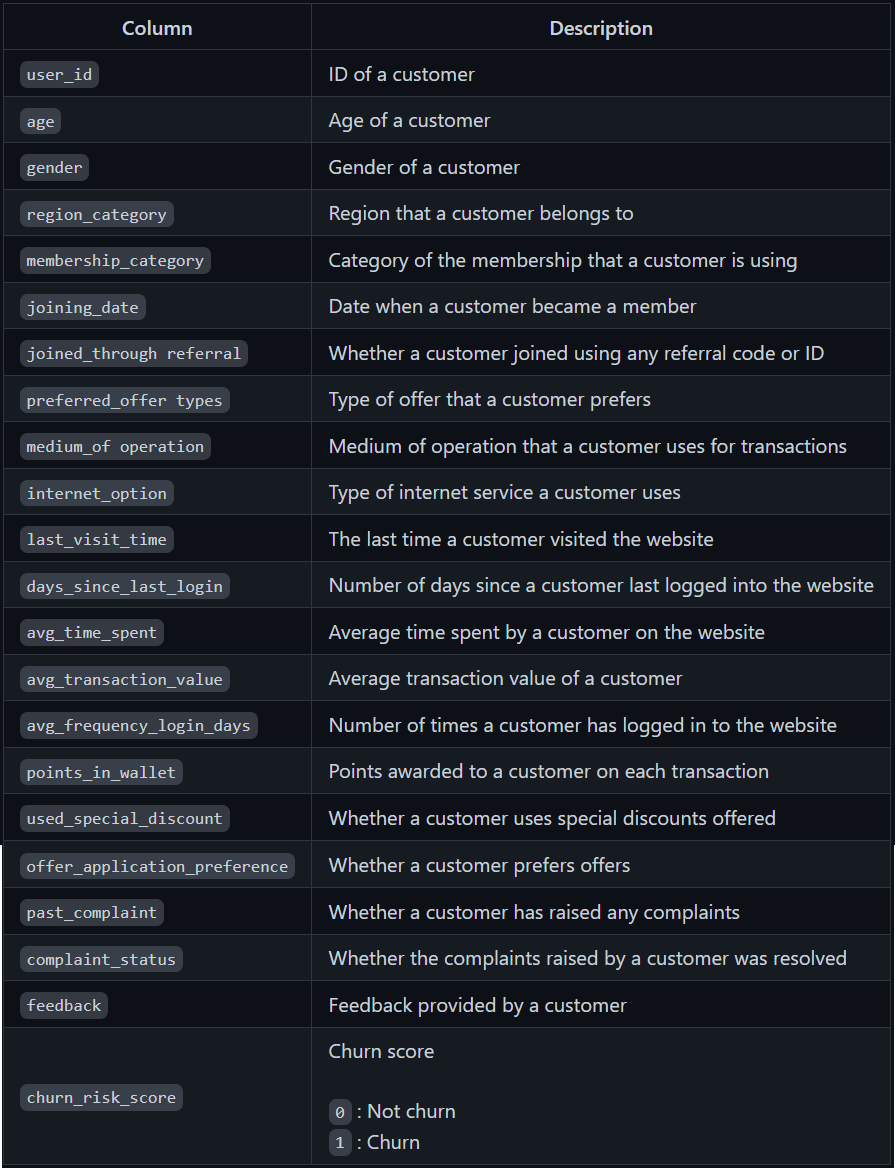

The following is an explanation of the dataset according to Milestone's instructions

# **4 - Exploratory Data Analysis (EDA)**

---

This section contains data exploration on the dataset above using queries, grouping, simple visualization, and so on.

In [3]:
# Check data describe
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


At first glance, the `days_since_last_login, avg_time_spent, avg_transaction_value` and `points_in_wallet` data appear to have right extreme skewness. The youngest age is 10 years old and the oldest is 64 years old. The maximum `points_in_wallet` is at 2069.07.

In [4]:
# Check data info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

The dataset consists of 15 columns of categorical data and 7 columns of numerical type. From the data above, at first glance, there are missing values in several columns that will be handled later.

In [5]:
# Check missing value
mvCount = churn.isnull().sum()
mvPerc = (mvCount / len(churn)) * 100

# Concate
mv = pd.concat([mvCount, mvPerc], axis=1)

# Display
mv

,0,1
user_id,0,0.000000
age,0,0.000000
gender,59,0.159416
region_category,5431,14.674412
membership_category,0,0.000000
joining_date,0,0.000000
joined_through_referral,5442,14.704134
preferred_offer_types,288,0.778168
medium_of_operation,5395,14.577141
internet_option,0,0.000000


Missing values are in the `gender, region_category, joined_through_referral, preferred_offer_types` and `medium_of_operation` columns which will be handled later.

In [6]:
# Check data duplicate
print('Data Duplicate : ', churn.duplicated().sum())

# Find duplicate
churn[churn.duplicated()]

Data Duplicate :  18


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,...,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,...,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,...,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


There are 18 duplicates in the dataset to be dropped

In [9]:
# Drop data duplicated
churn = churn.drop_duplicates()

# Check data duplicated
print('Data Duplicate : ', churn.duplicated().sum())

Data Duplicate :  0


Duplicated data is successfully removed from the dataset

In [10]:
# Function Visualization
def diagnosticPlots(df, variable):
  plt.figure(figsize=(18, 25))

  # Histogram
  plt.subplot(5, 1, 1)
  sns.histplot(df[variable], bins=50)
  plt.title('Histogram '+variable)

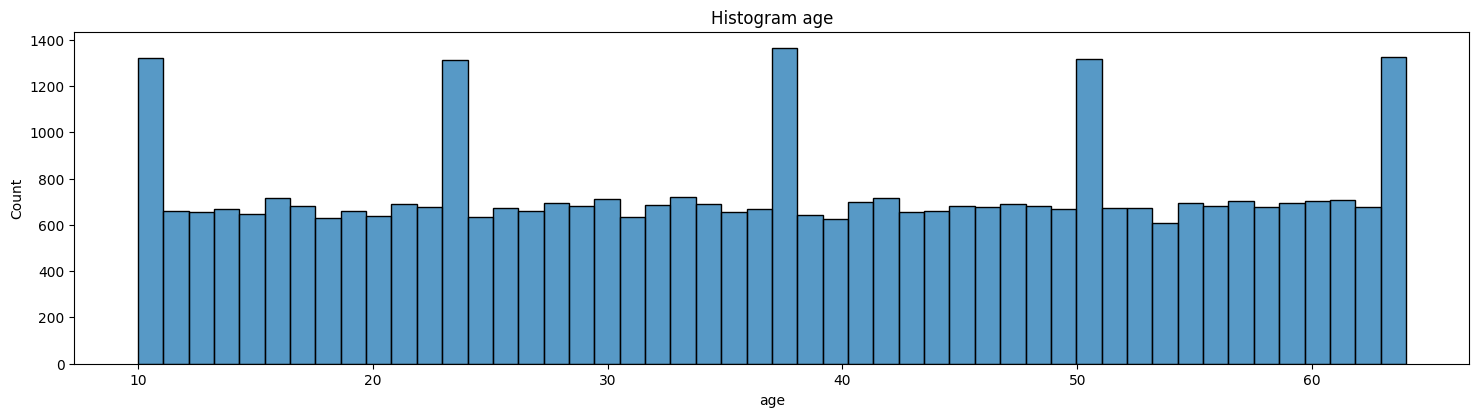

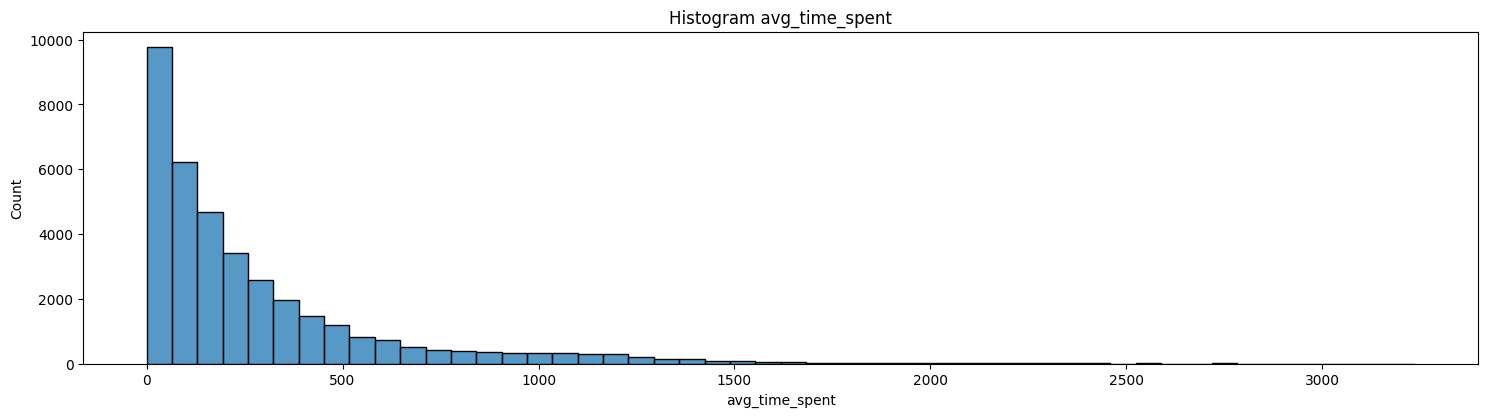

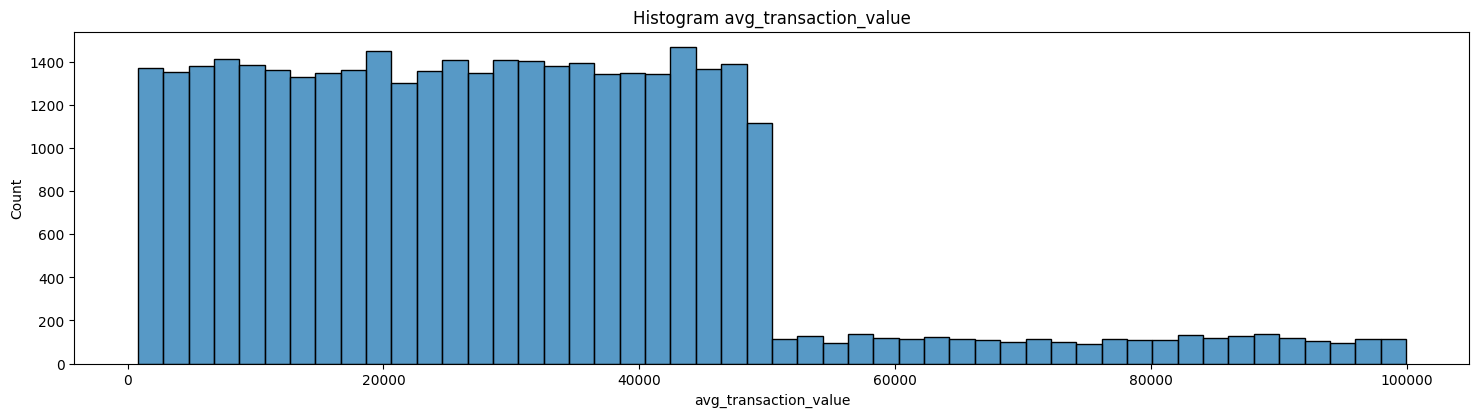

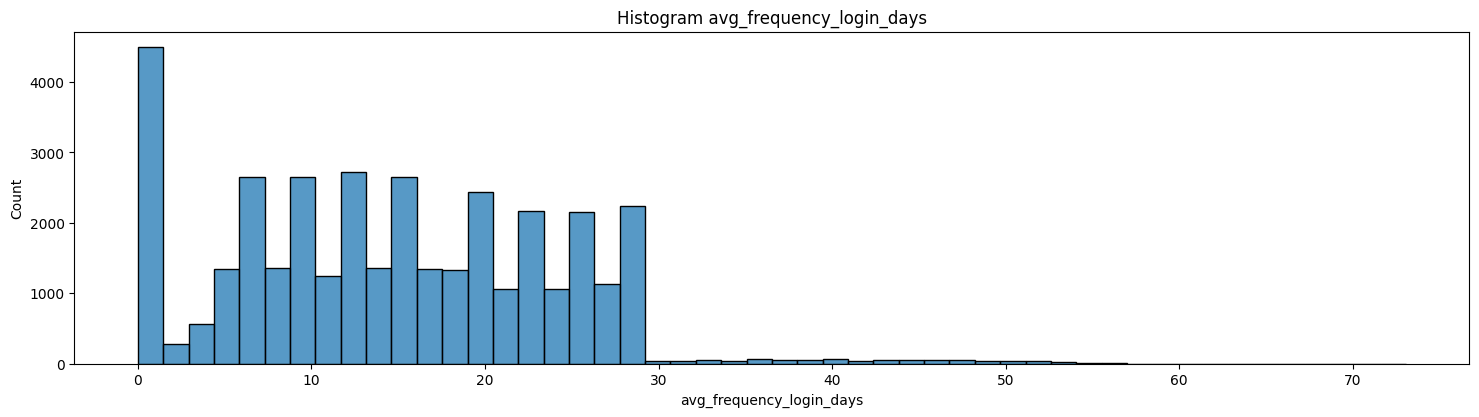

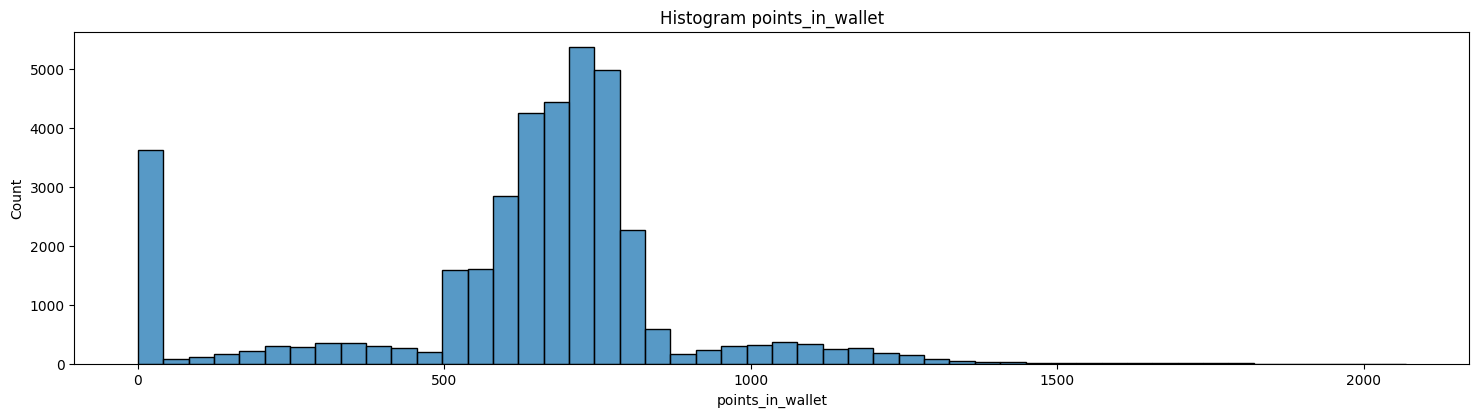

In [11]:
# Check data distribution
diagnosticPlots(churn, 'age')
diagnosticPlots(churn, 'avg_time_spent')
diagnosticPlots(churn, 'avg_transaction_value')
diagnosticPlots(churn, 'avg_frequency_login_days')
diagnosticPlots(churn, 'points_in_wallet')

Almost every age range subscribes to this service, with the average time spent being up to **500**. These users spend around **50,000** subscribing to the service. Rarely do users log in more than 30 times. The largest range of user points is in the 800s with a total of more than **8,000** subscribers.

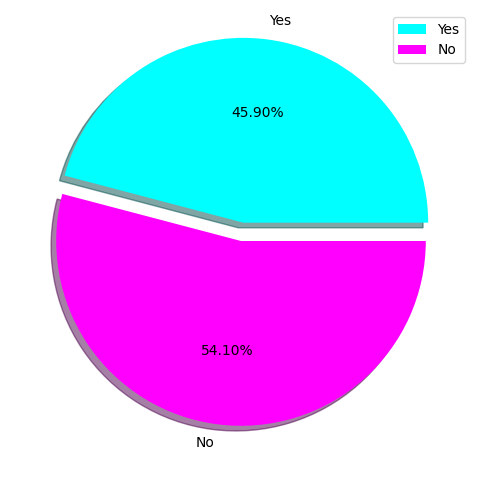

In [12]:
# Pie chart of churn
plt.figure(figsize= (10, 6))
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(churn['churn_risk_score'].value_counts(ascending=True), 
        labels= labels,
        explode = explode,
        autopct="%1.2f%%", shadow=True, colors=['#00FFFF', '#FF00FF'])
plt.legend()
plt.show()

The dataset looks quite balanced with a percentage of **45.9%** churned and **54.1%** not churned.

In [19]:
# Visualization Function
def infographic(dataframe, catCol, target):
    print("".center(100, "#"))
    print(dataframe[catCol].value_counts())
    print("".center(100, "#"))
    cat_feat_colors = ['#FF007F', '#00FFFF', '#FF00FF', '#FFC0CB', "#FF0000", "#FF7F00"]
    plt.figure(figsize=(25, 10))
    sns.set_style("whitegrid")
    plt.suptitle(catCol.capitalize(), size=20)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[catCol].value_counts().values.tolist(),
            labels=dataframe[catCol].value_counts().keys().tolist(),
            labeldistance=1.15,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=cat_feat_colors,
            autopct='%1.0f%%')

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=catCol, palette=cat_feat_colors)
    plt.xticks(rotation=60)
    plt.tight_layout(pad=3)

    ax = plt.subplot(1, 3, 3)
    cross = pd.crosstab(dataframe[catCol], dataframe['churn_risk_score']).apply(lambda x: x/x.sum()*100, axis=1)
    cross.plot(kind='bar', ax=ax, stacked=False, rot=0, color=cat_feat_colors)
    plt.title(f"Percentages plot of {catCol.capitalize()}")
    plt.xticks(rotation=60)
    plt.show(block=True)

####################################################################################################
F    18490
M    18443
Name: gender, dtype: int64
####################################################################################################


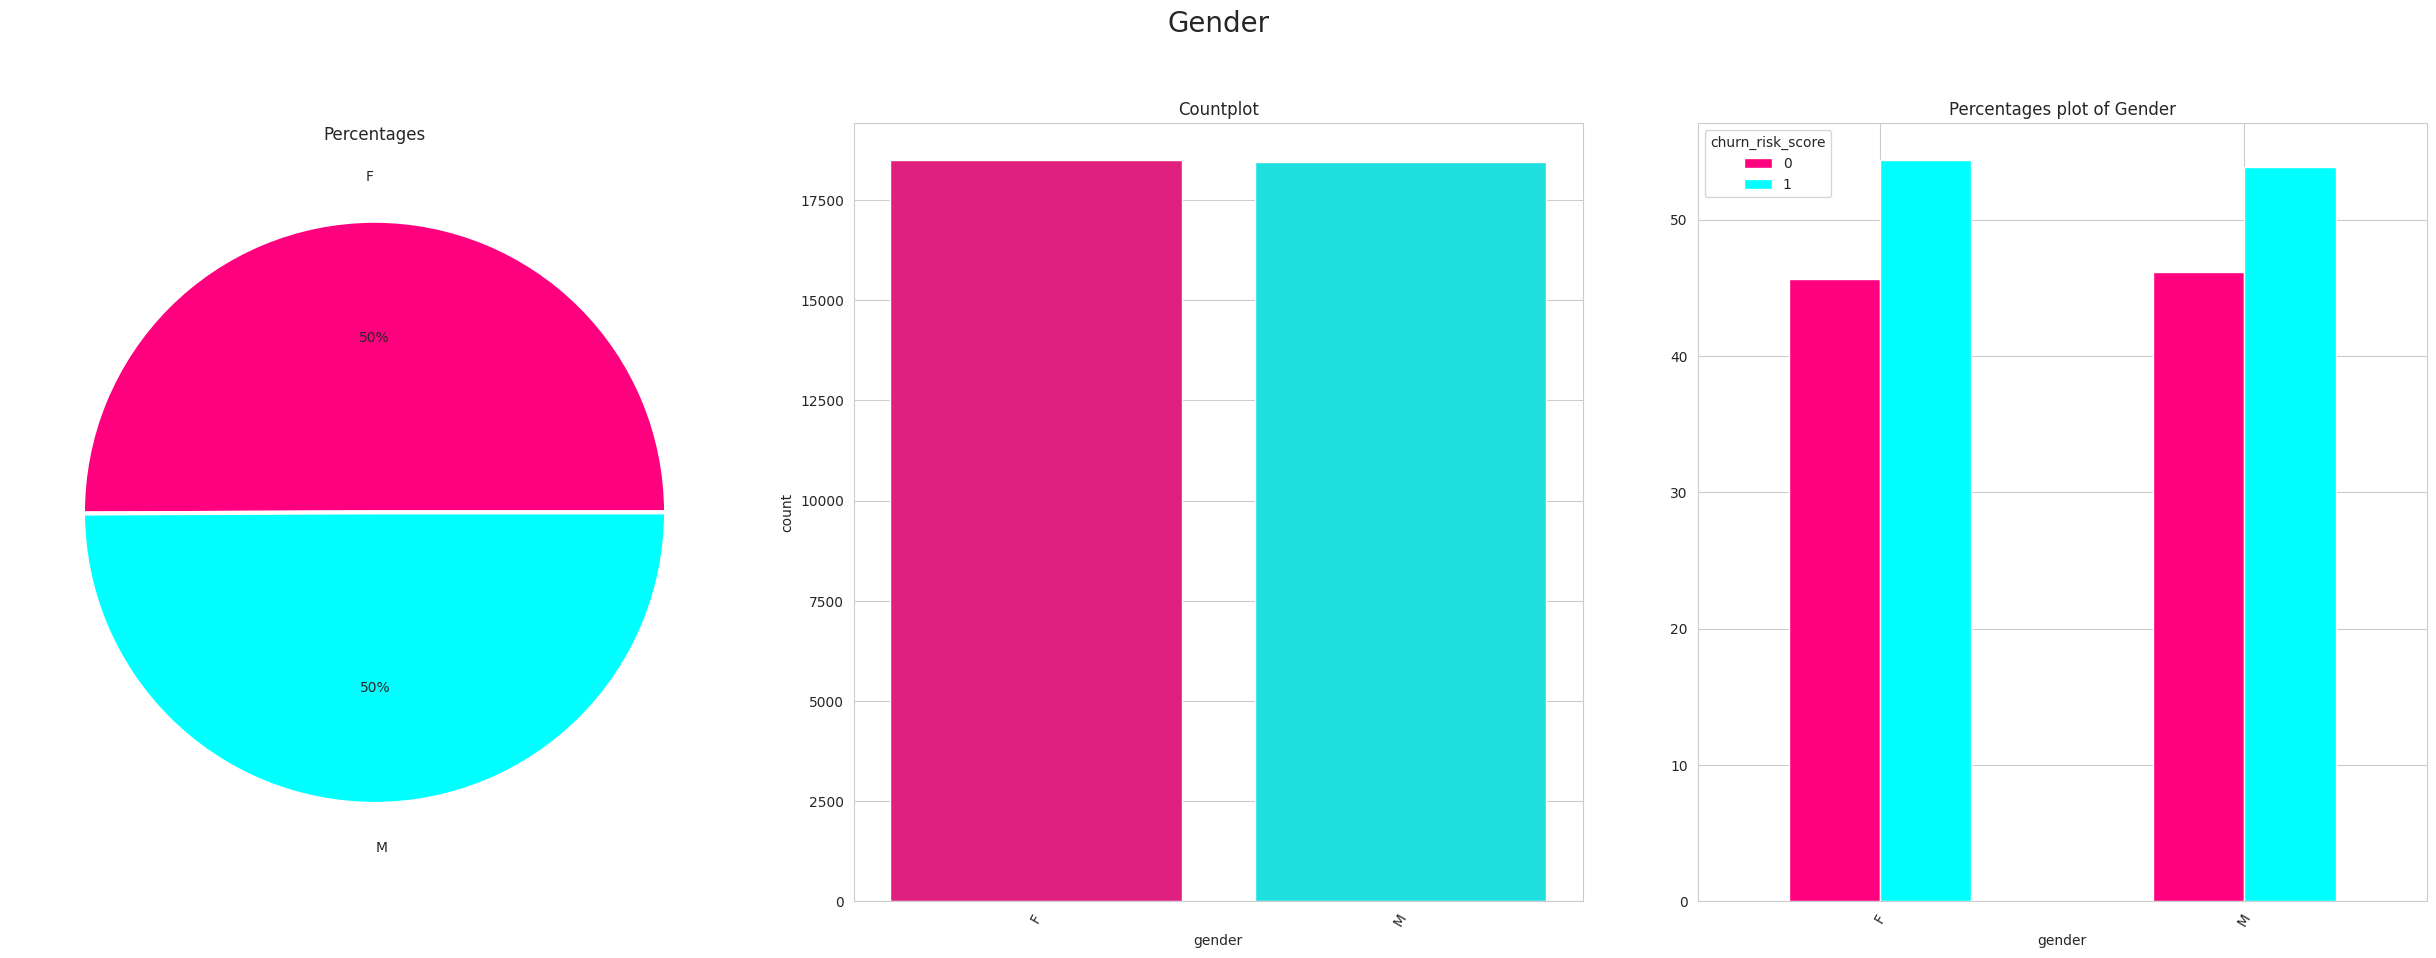

####################################################################################################
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
####################################################################################################


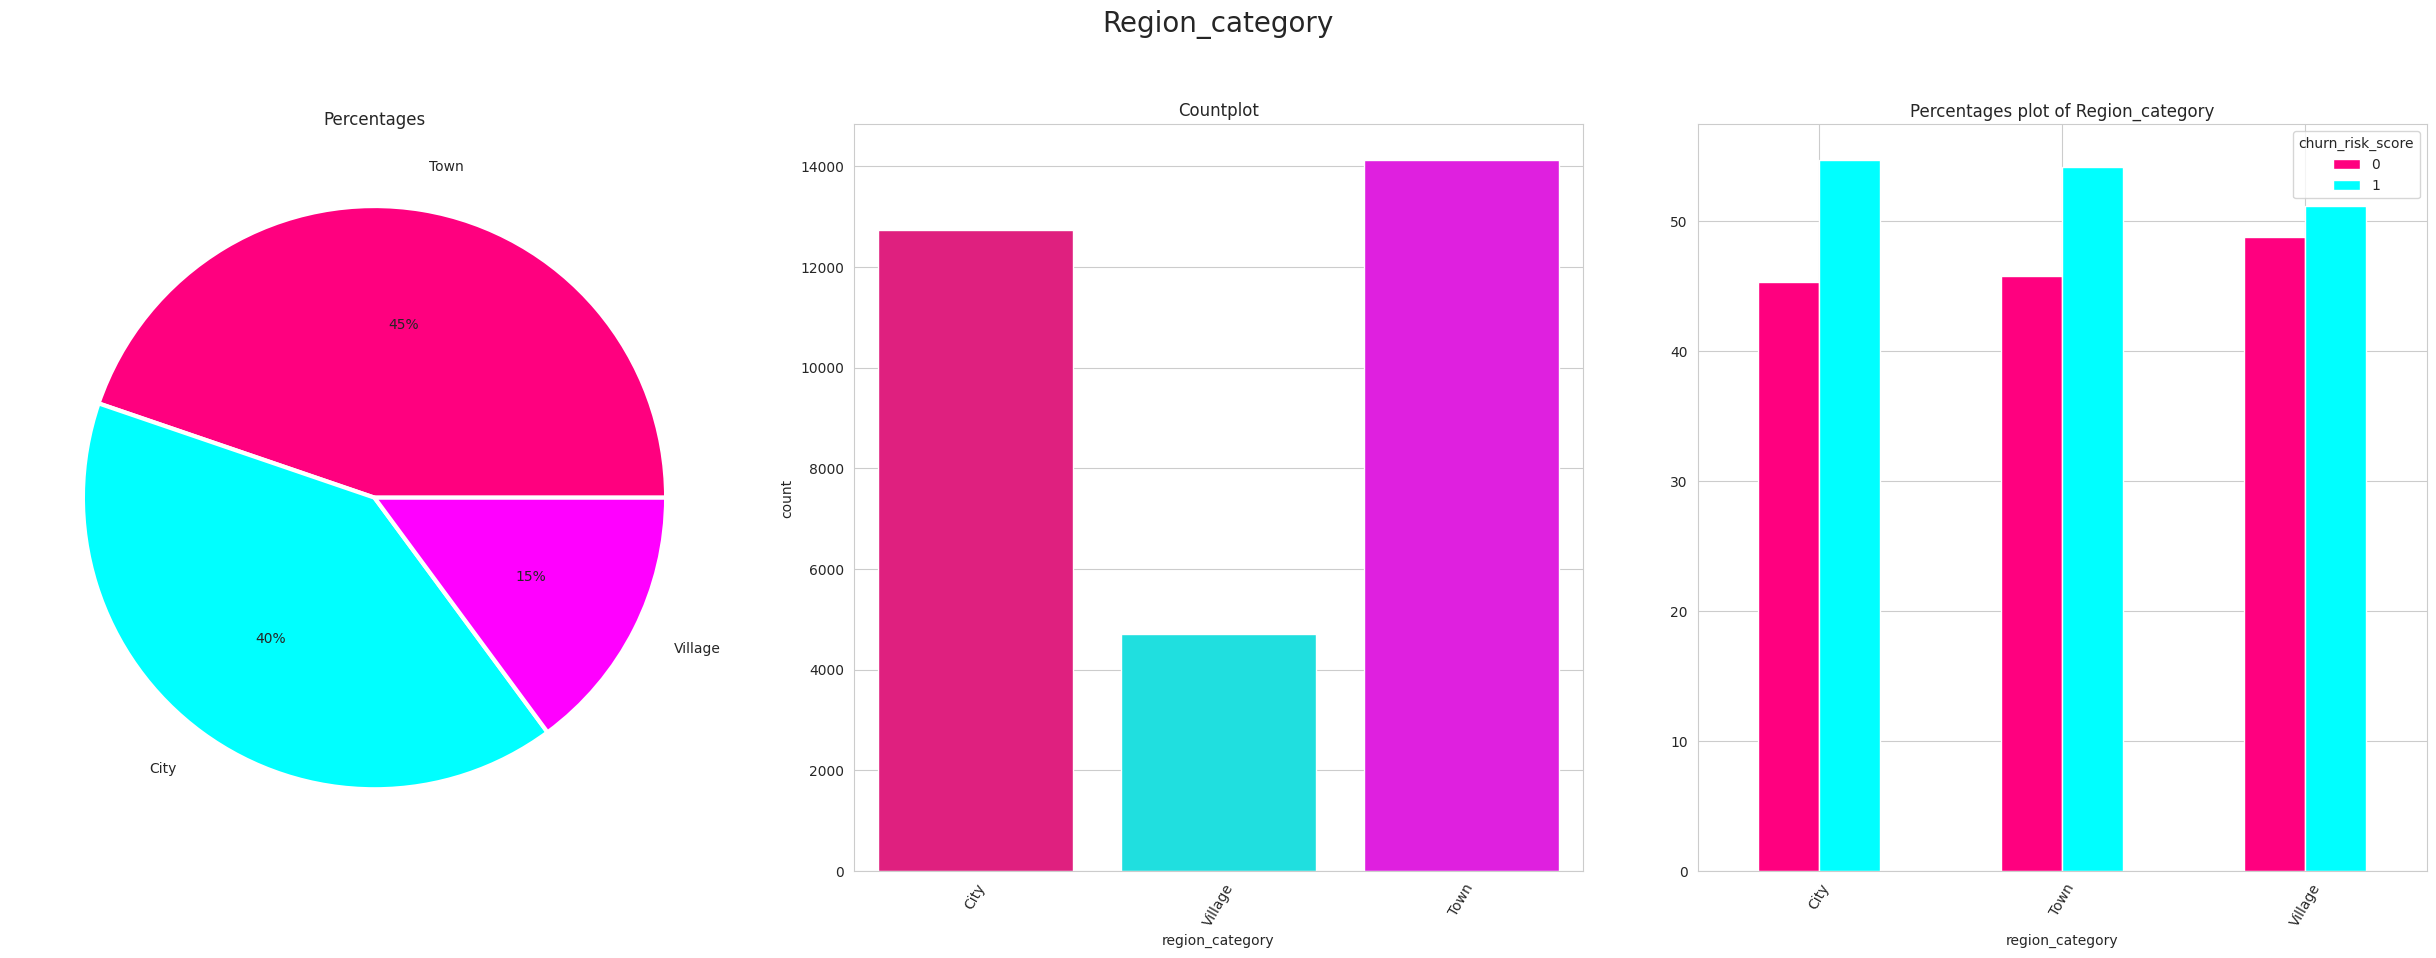

####################################################################################################
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
####################################################################################################


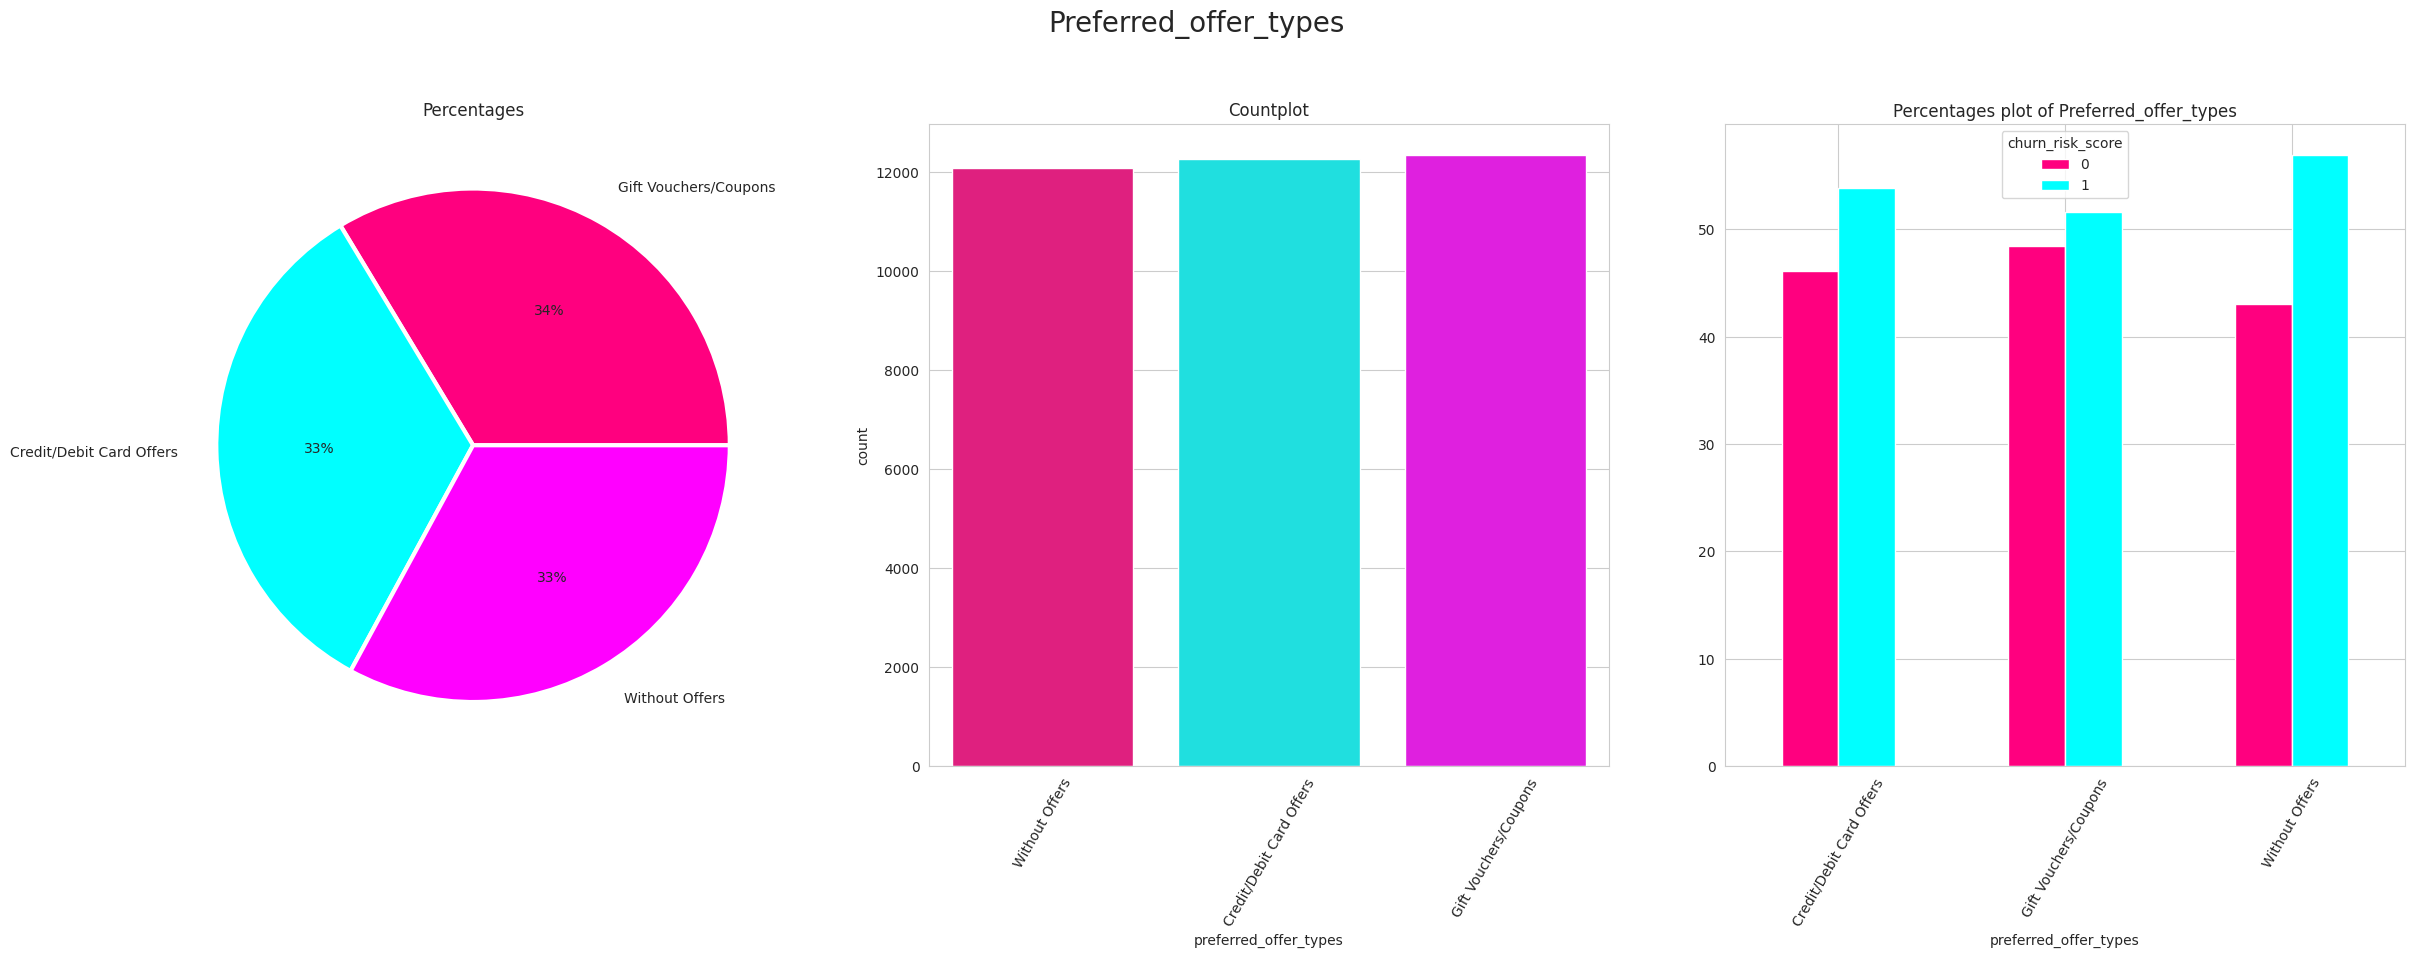

####################################################################################################
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64
####################################################################################################


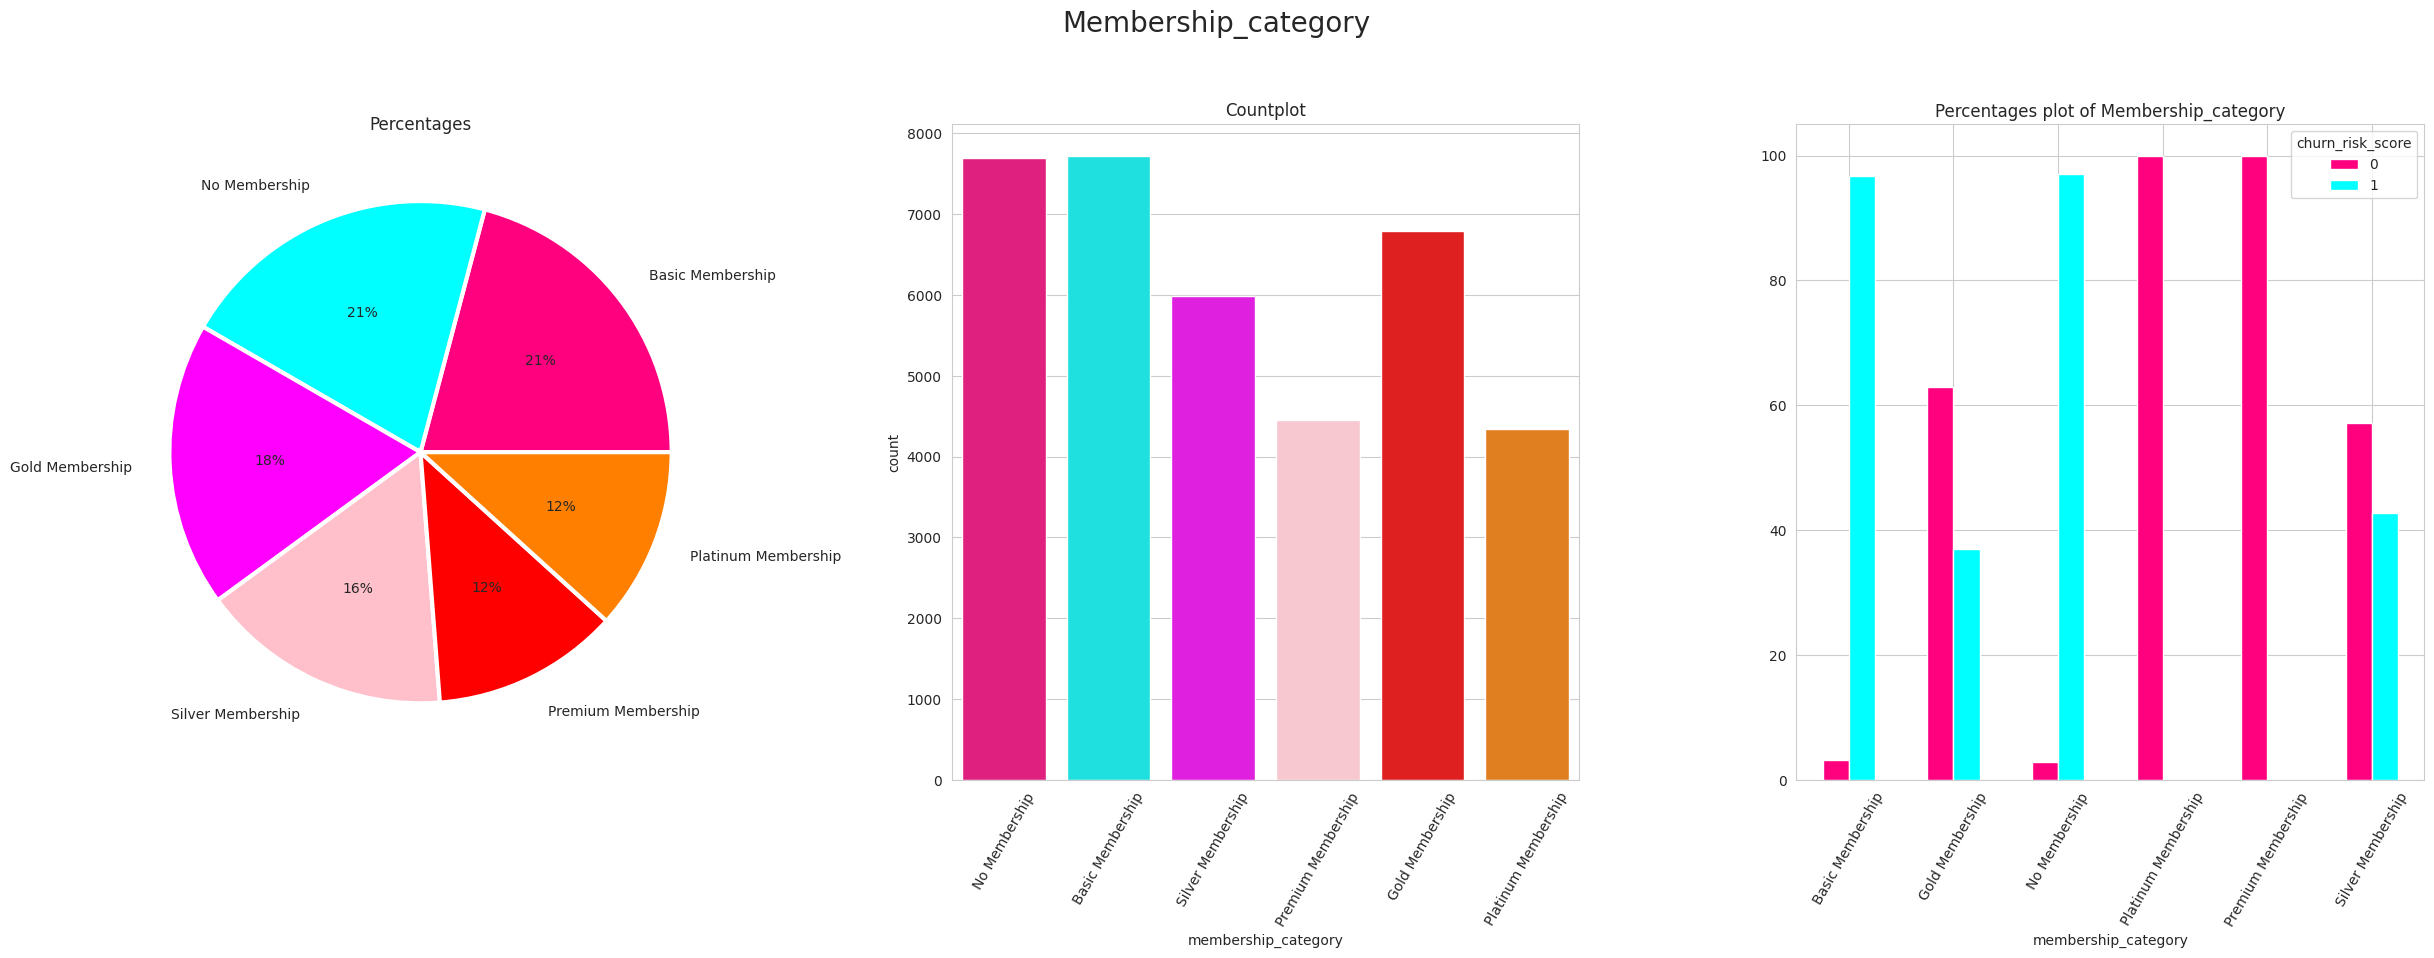

####################################################################################################
Desktop       13913
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
####################################################################################################


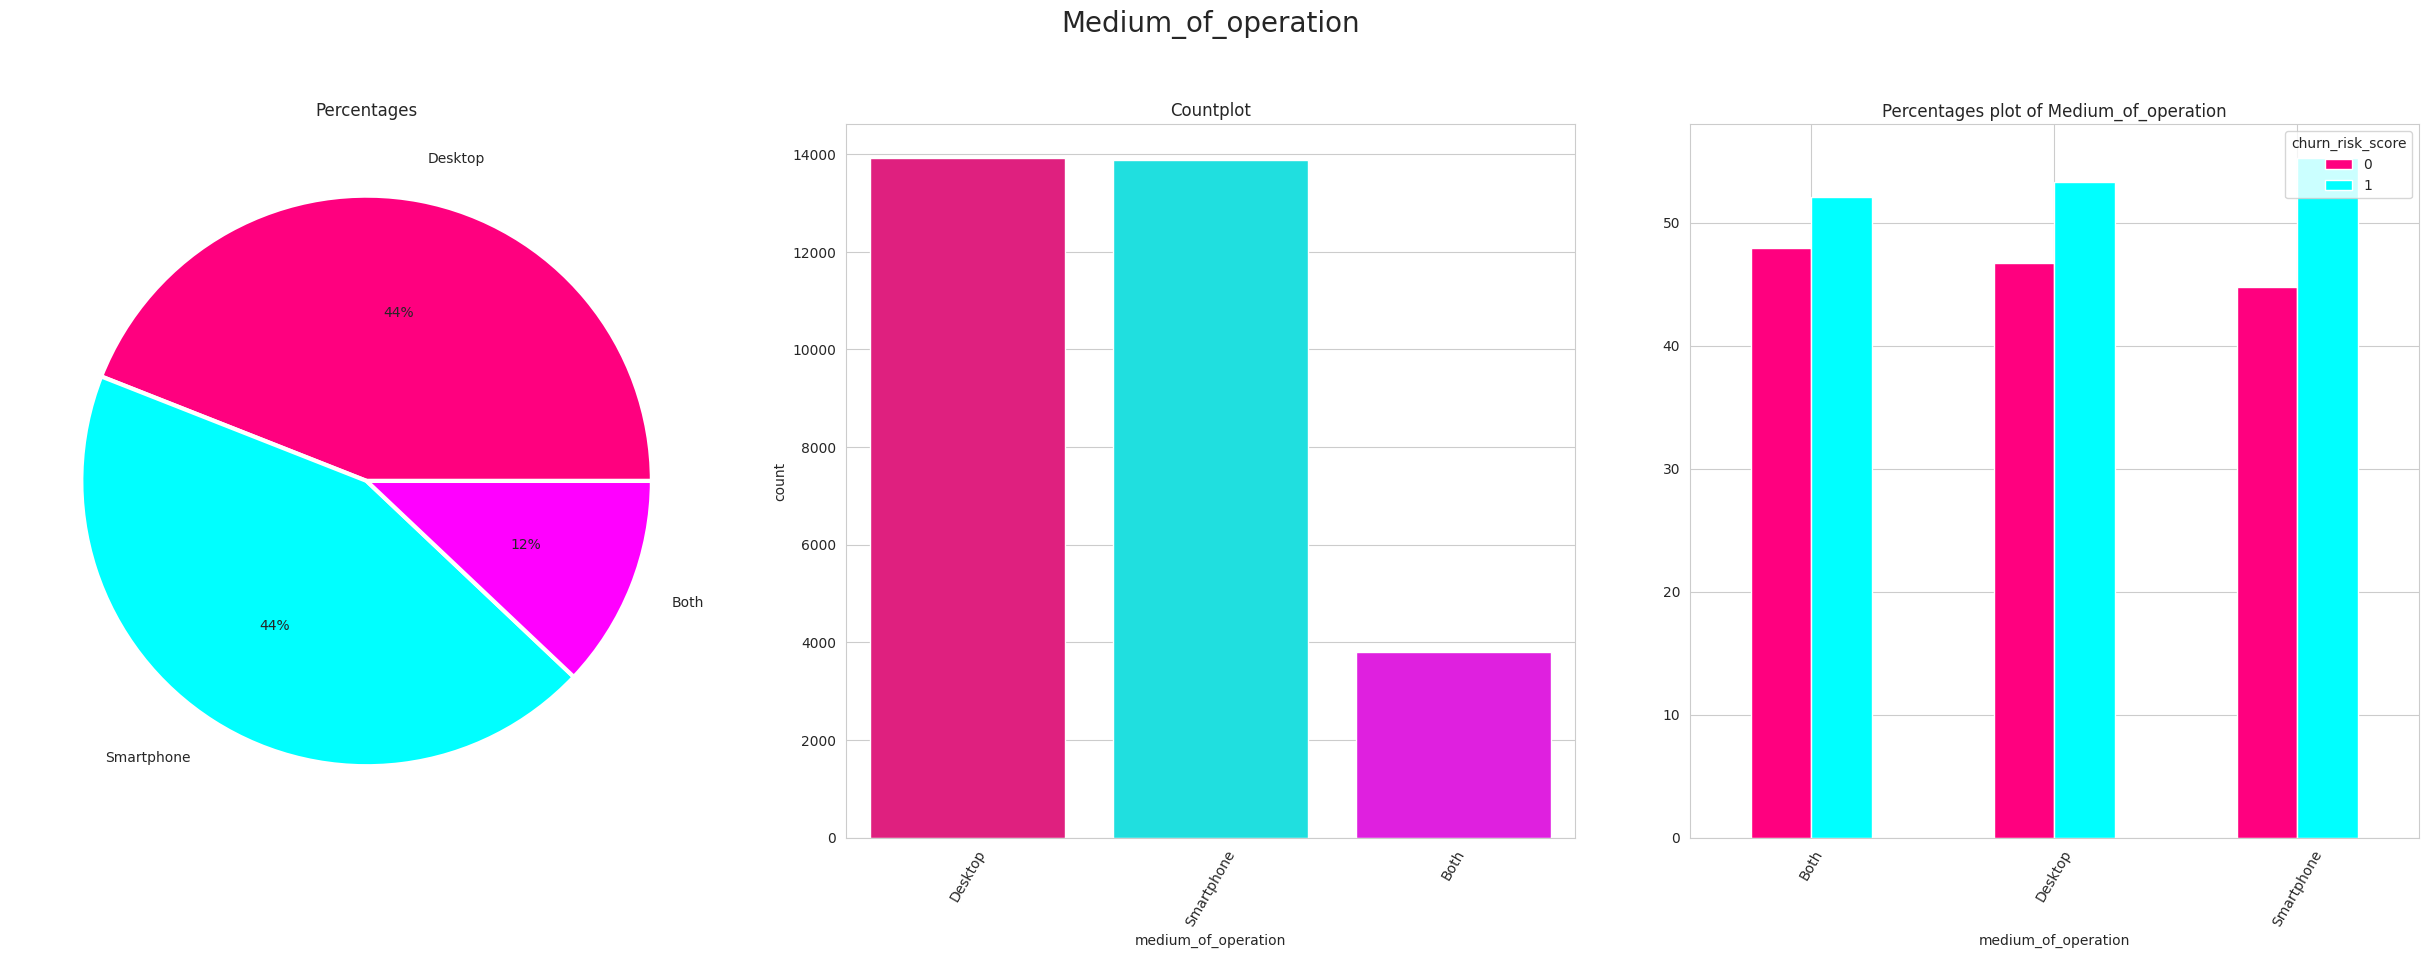

####################################################################################################
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64
####################################################################################################


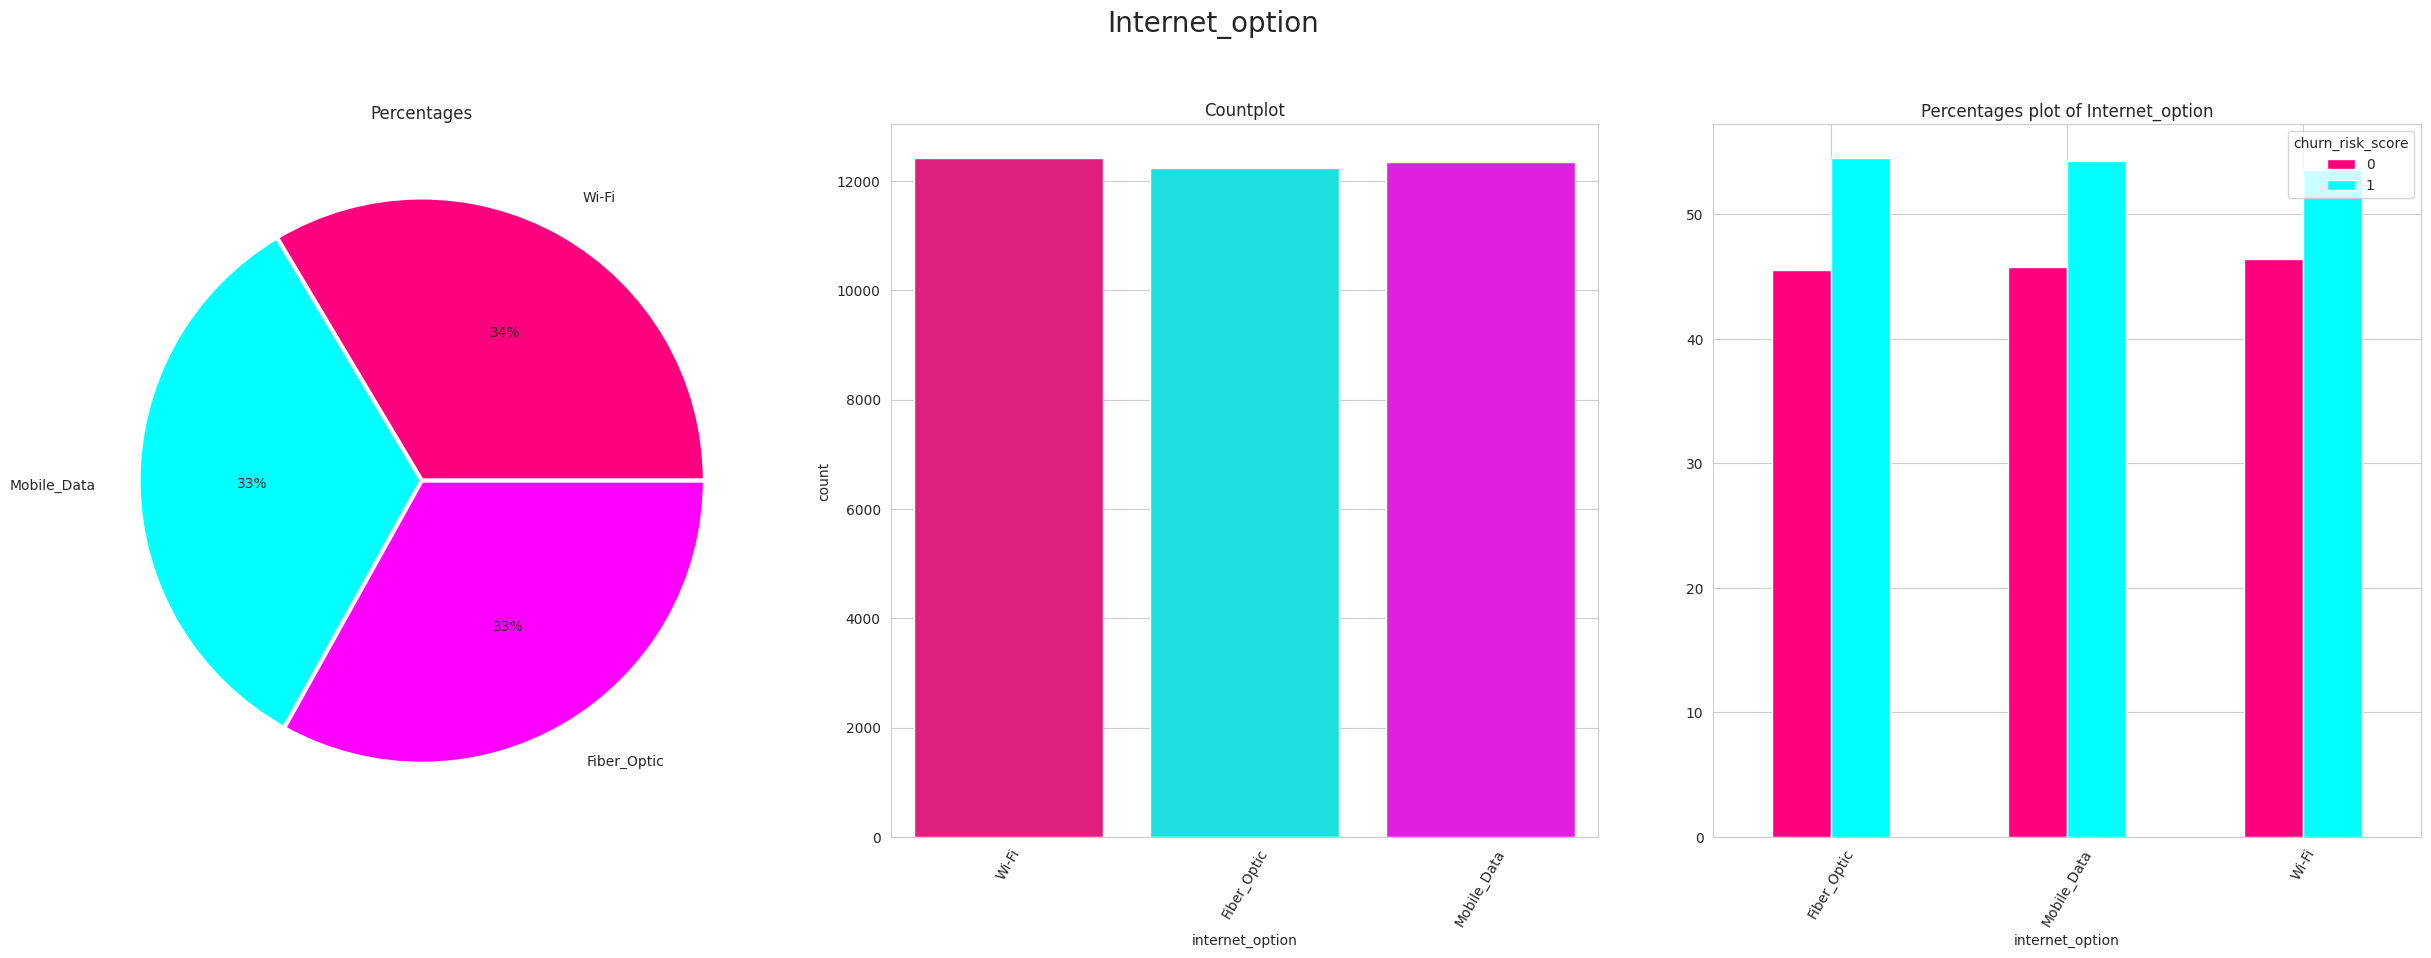

In [20]:
# Infografis churn base on user info
infoUser = ['gender', 'region_category', 'preferred_offer_types', 'membership_category', 'medium_of_operation', 'internet_option']
for col in infoUser:
    infographic(churn, col, "churn_risk_score")

Based on the visualization above, we can get :

1. The percentage of male and female customers is equal at around 17,800 people. The churn potential based on gender is equally large at more than 50%.
2. The users from town are the most customers with a total of 45%, and the lowest are from the village. However, customers from the village are the lowest churn category compared to customers from the City and Town. This may be due to the fact that there is less access to entertainment for customers from the village so they decide to continue subscribing.
3. Customers with No Membership and Basic Membership make up the largest number of subscribers at 21% but these 2 membership categories also contribute the most to churn at more than 90%. Customers with Premium and Platinum Membership are loyal customers whose churn rate is below 1%.
4. Many customers only use smartphones and desktops to enjoy the service, but smartphone-only customers also have the highest percentage of churn. This is due to the possibility that there are many similar competitors that have penetrated the smartphone world.
5. Both Wifi, Mobile data and Fiber-optic are the choice of users with the same percentage of around 33%, directly proportional to the churn rate above 50%.
6. Customers with no offers whatsoever have a higher unsubscribe percentage than those with offers. This is worth noting because perhaps by providing some kind of discount or other extra benefit, customers in this no-offer type will continue to subscribe to the services provided.

####################################################################################################
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64
####################################################################################################


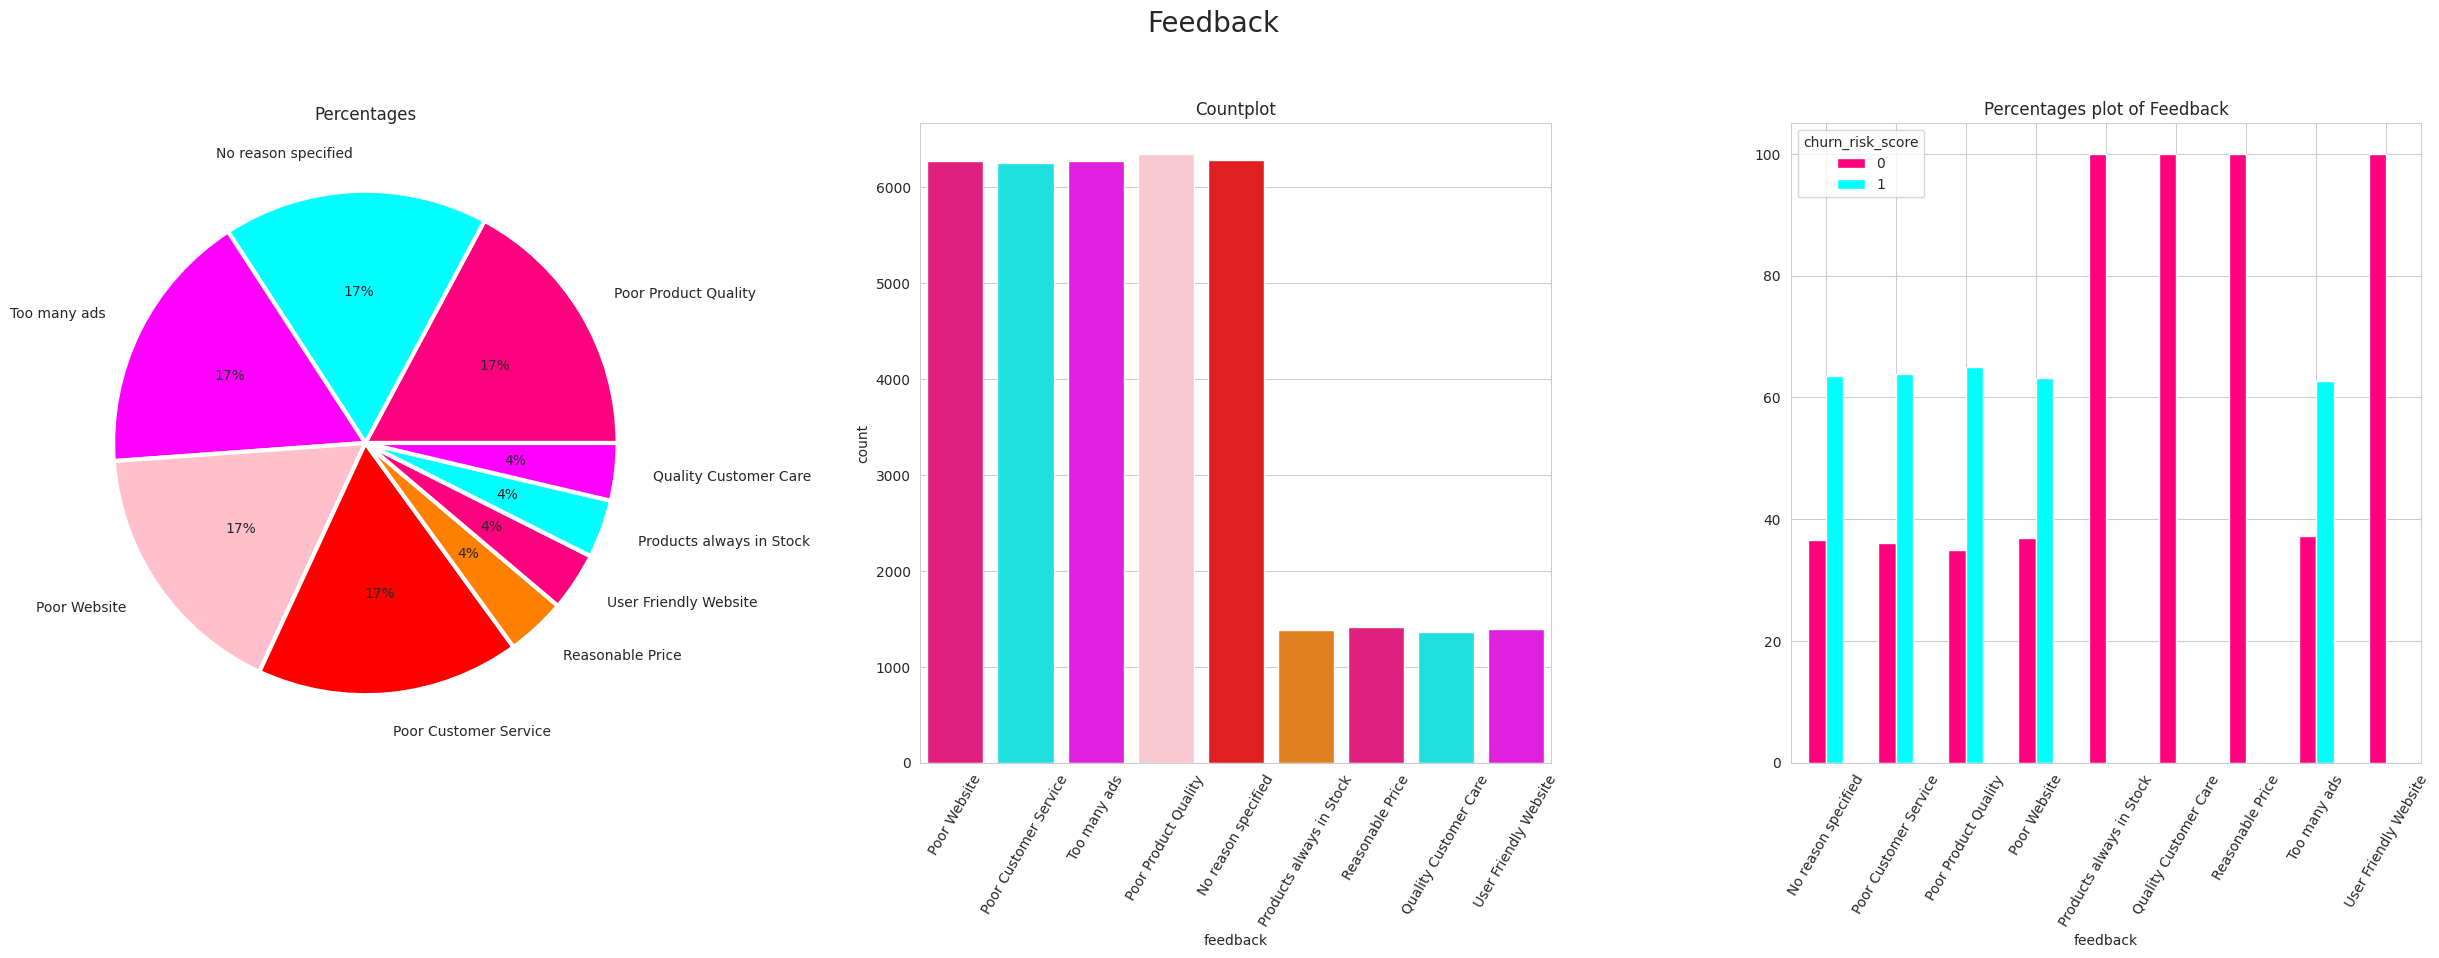

####################################################################################################
Yes    20342
No     16650
Name: used_special_discount, dtype: int64
####################################################################################################


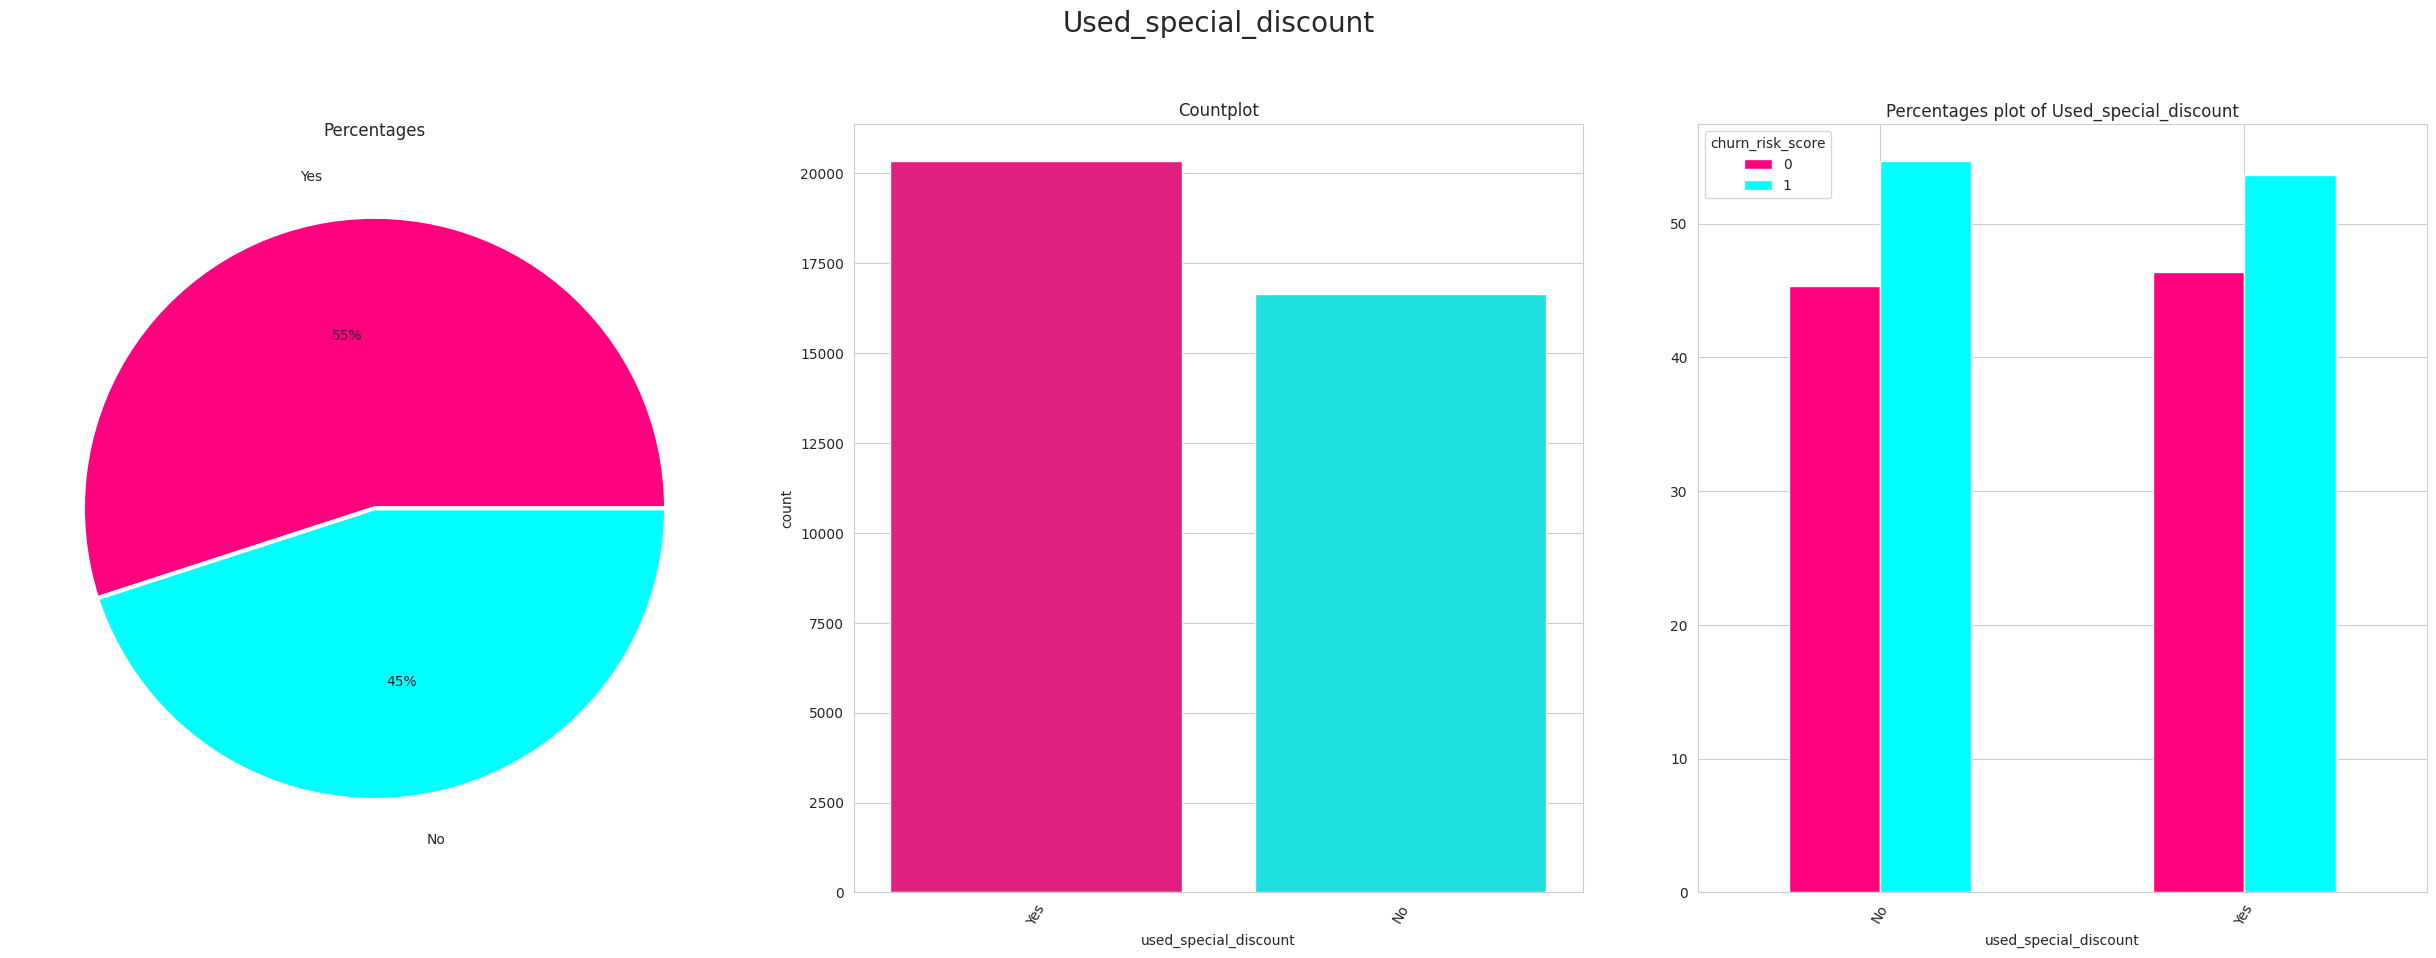

####################################################################################################
No     18602
Yes    18390
Name: past_complaint, dtype: int64
####################################################################################################


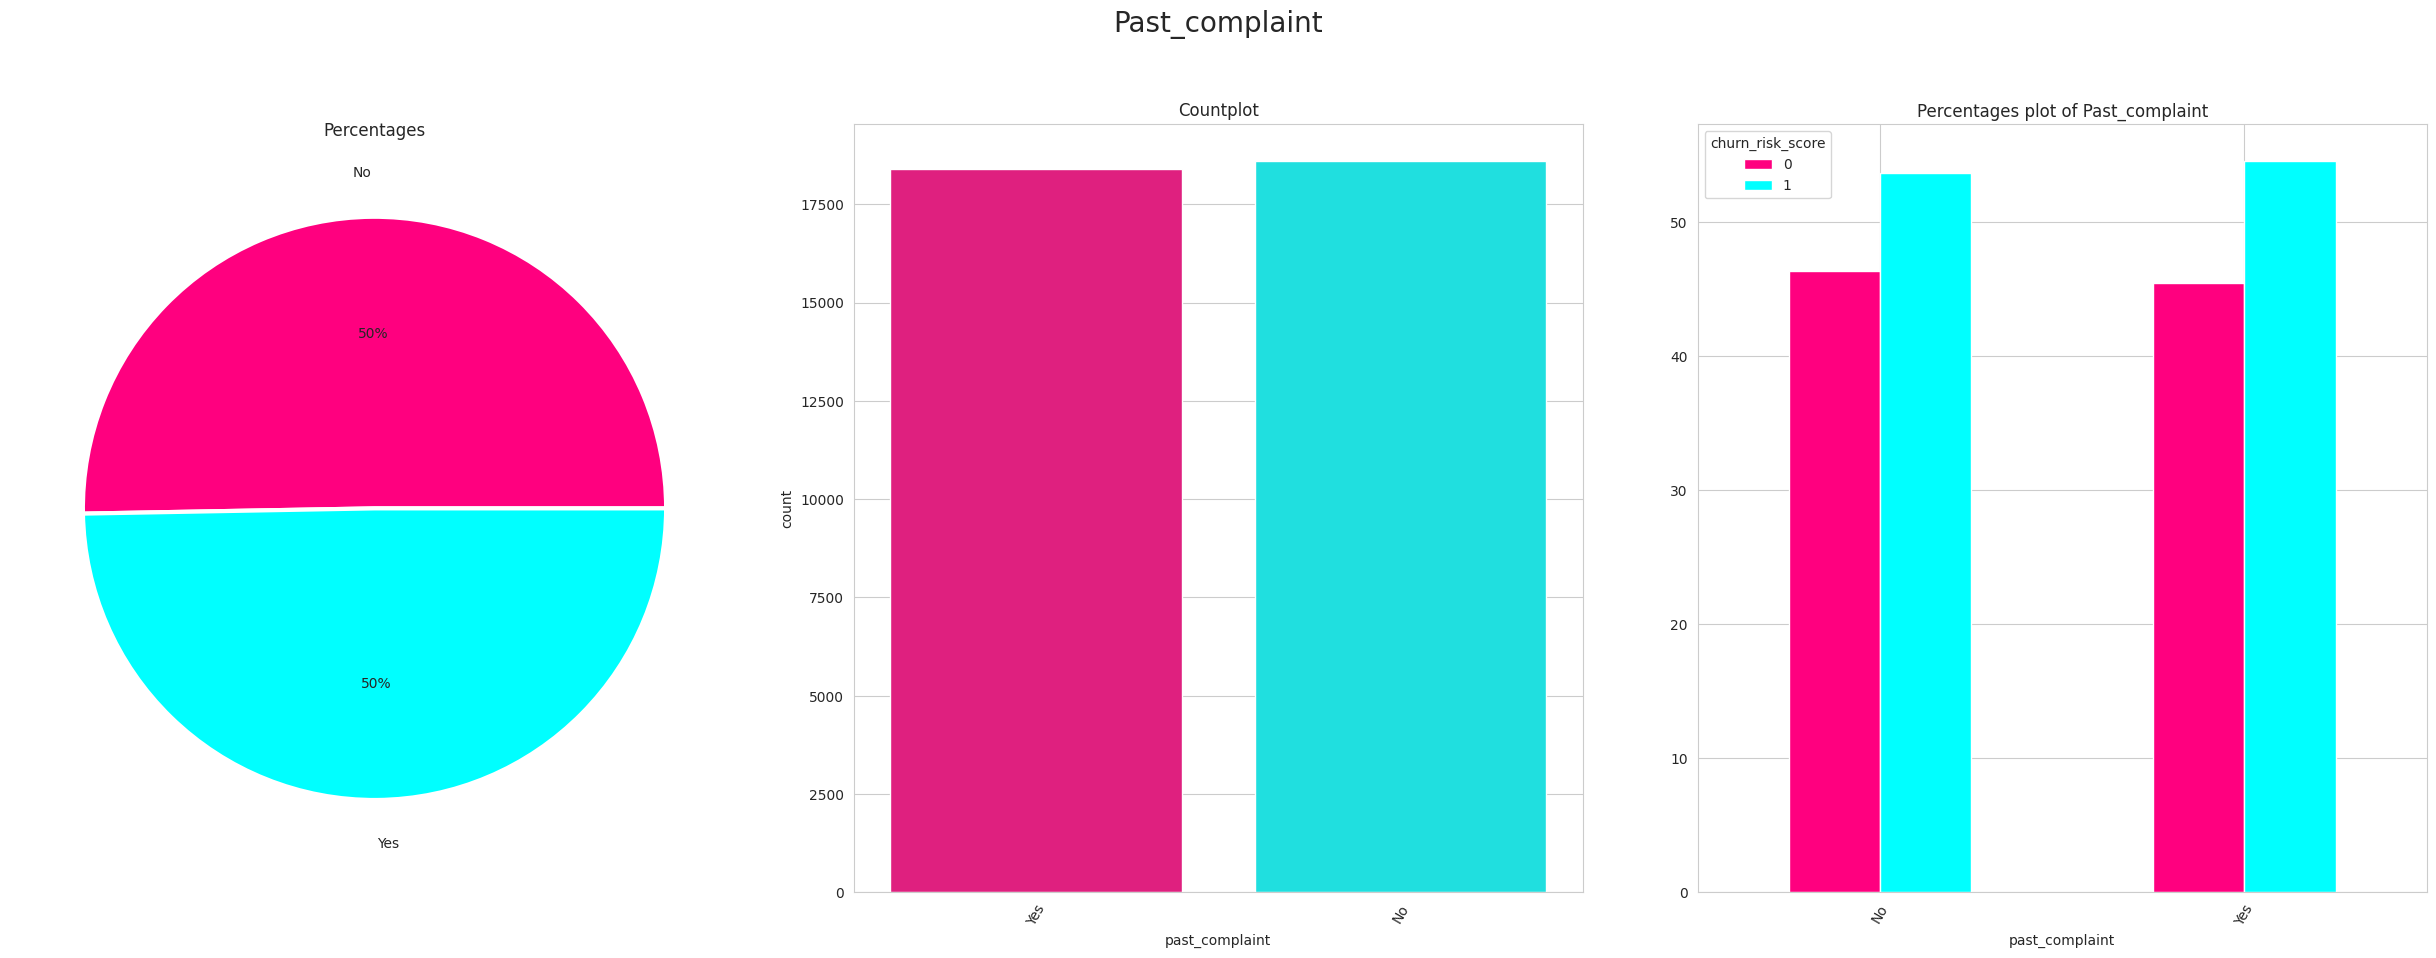

####################################################################################################
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64
####################################################################################################


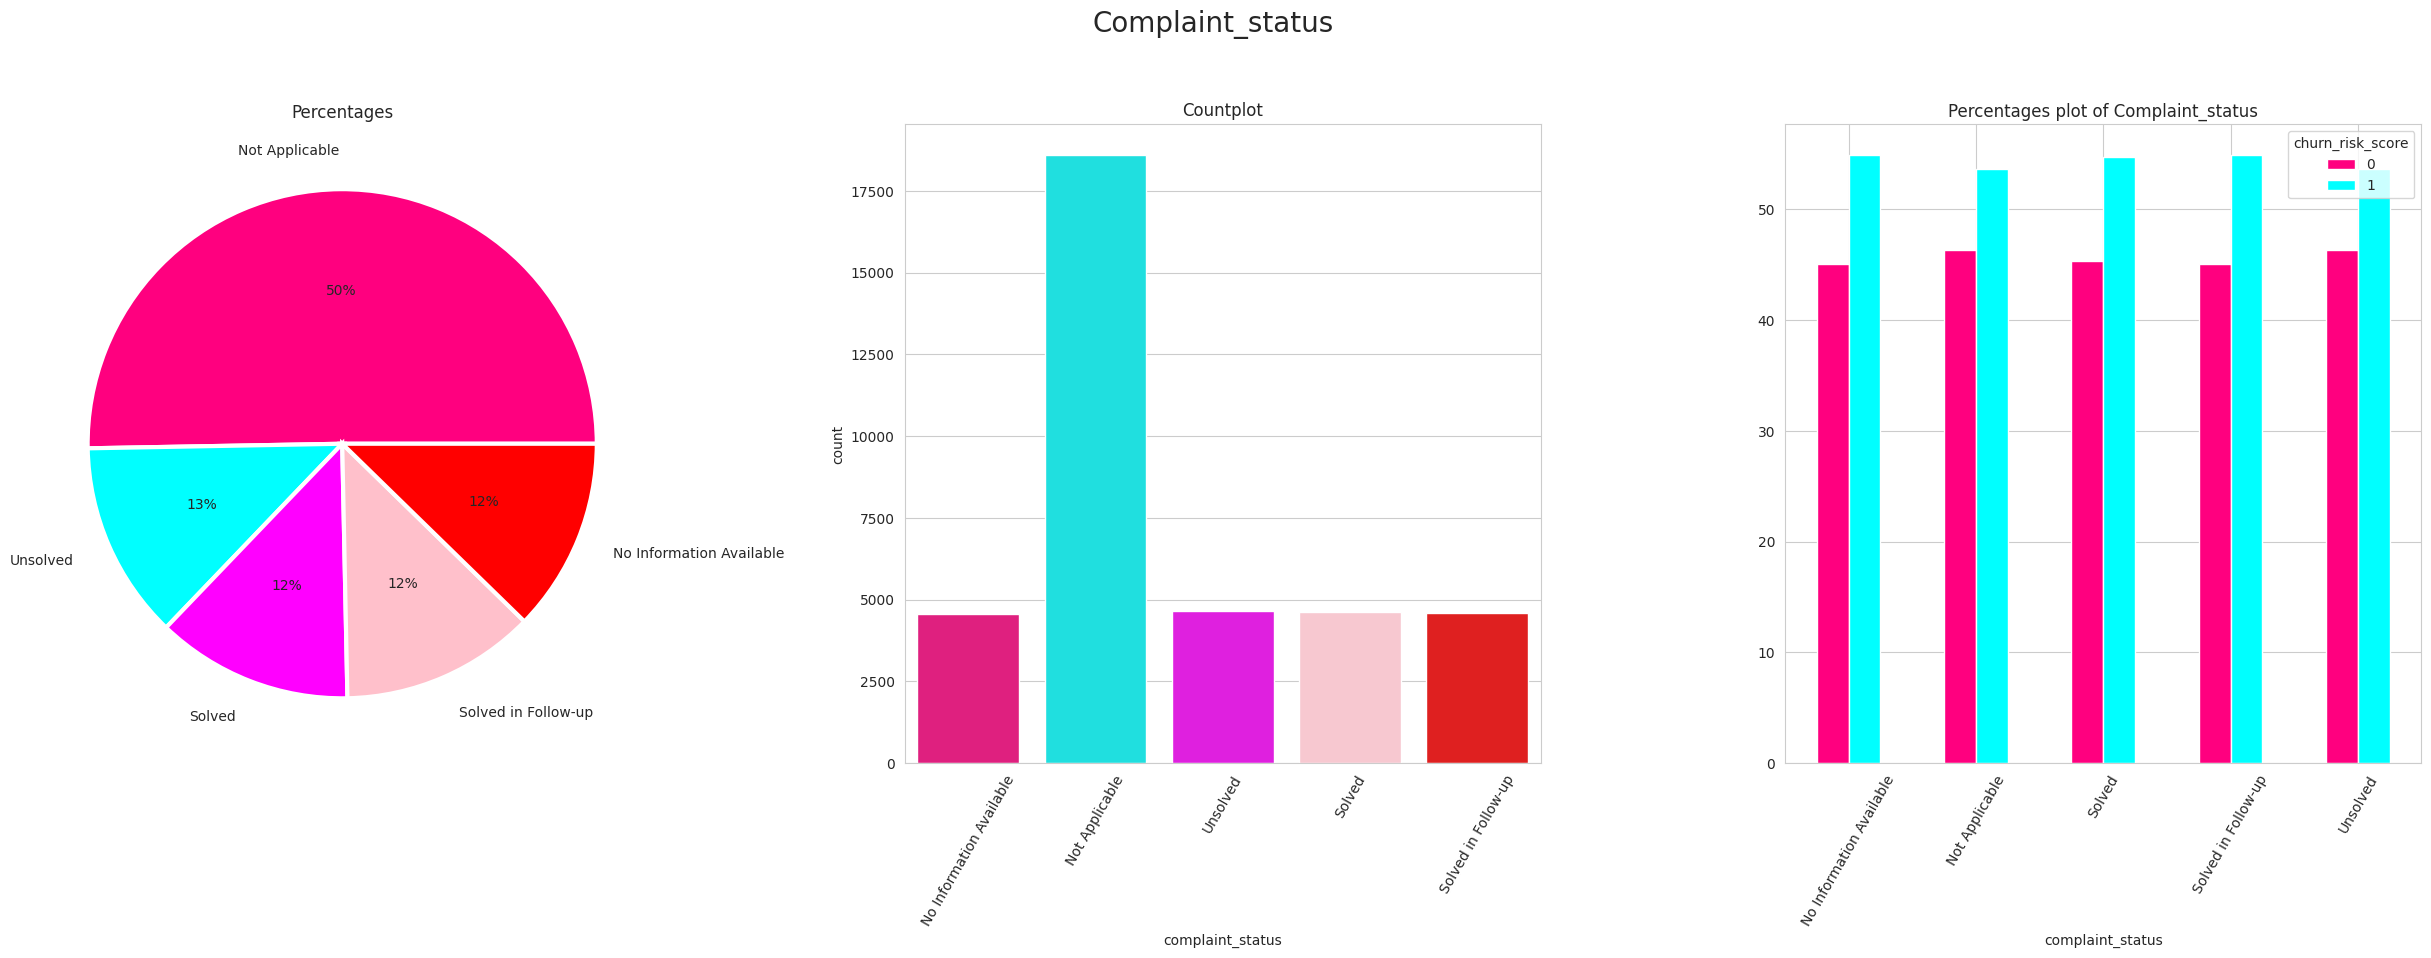

In [21]:
# Infografis churn base on extra information
infoExtra = ['feedback', 'used_special_discount', 'past_complaint', 'complaint_status']
for col in infoExtra:
    infographic(churn, col, "churn_risk_score")

Based on the extra information above, we can get :

1. Feedback with No Reason Specific, Poor Customer Service, Poor Product Quality, Poor Website and Too many ads are the underlying reasons for users not to continue their subscription anymore. Some of these things must be evaluated and improved so that customers feel satisfied and can re-subscribe.
2. The percentage of customers who use discounts to continue their subscription again is 55% and 44% do not use discounts. Even though given a discount or not the percentage of customers not to continue their subscription is still quite large, which is above 50%. This needs to be re-evaluated whether the company is effective enough to provide this discount because the costs incurred are not small.
3. Both customers who have or have not filed complaints are almost as many. Both are also directly proportional to the churn rate above 50%.
4. Complaints of status not applicable are the most complained about by customers. This may be due to delays in handling or infrastructure errors. But this is not the main reason why customers do not re-subscribe. It is worth investigating whether the status complaints from these customers have been handled properly or not.

# **5. Data Preprocessing**

---

This section contains the process of preparing the data for the model training process, such as dividing the data into train-tests, data transformation (normalization, encoding, etc.), and other necessary processes.

## 5.1 Data Binning

In [22]:
# Data age binning
criteria = [
    (churn['age'] >= 8) & (churn['age'] < 20),
    (churn['age'] >= 20) & (churn['age'] < 30),
    (churn['age'] >= 30) & (churn['age'] < 40),
    (churn['age'] >= 40) & (churn['age'] < 50),
    (churn['age'] >= 50) & (churn['age'] < 60),
    (churn['age'] >= 60)
]

binLabels = ['under20', 'under30', 'under40', 'under50', 'under60', 'above60']

churn['age_bin'] = pd.cut(churn['age'], bins=[9, 20, 29, 39, 49, 59, float('inf')], labels=binLabels)

# Check unique value
churn.age_bin.unique()

['under30', 'under60', 'above60', 'under40', 'under50', 'under20']
Categories (6, object): ['under20' < 'under30' < 'under40' < 'under50' < 'under60' < 'above60']

In [23]:
# Get Year of join from column joining date
# Change to datetim
churn['joining_date'] = pd.to_datetime(churn['joining_date'])

# Get year only
churn['joining_year'] = churn['joining_date'].dt.year

# Display
churn['joining_year']

0        2017
1        2017
2        2017
3        2015
4        2015
         ... 
37005    2015
37006    2017
37007    2015
37008    2016
37009    2016
Name: joining_year, Length: 36992, dtype: int64

## 5.2 Splitting between X and y

In [24]:
# Split data
trainValDF, testDF = train_test_split(churn, test_size=0.15, random_state=19, stratify = churn.churn_risk_score)
trainDF, valDF = train_test_split(trainValDF, test_size=0.15, random_state=19, stratify = trainValDF.churn_risk_score)

print('Train Size : ', trainDF.shape)
print('Validation size : ', valDF.shape)
print('Test size  : ', testDF.shape)

Train Size :  (26726, 24)
Validation size :  (4717, 24)
Test size  :  (5549, 24)


## 5.3 Missing Value Handling

In [25]:
# Missing value in train-set
trainDF.isnull().sum()

user_id                            0
age                                0
gender                            46
region_category                 3880
membership_category                0
joining_date                       0
joined_through_referral         3895
preferred_offer_types            197
medium_of_operation             3860
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
age_bin                            0
joining_year                       0
dtype: int64

Missing value data train is in columns `gender, region_category, joined_through_referral, preferred_offer_types` and `medium_of_operation`

In [26]:
# Missing value in validation-set
valDF.isnull().sum()

user_id                           0
age                               0
gender                            1
region_category                 724
membership_category               0
joining_date                      0
joined_through_referral         720
preferred_offer_types            43
medium_of_operation             690
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
age_bin                           0
joining_year                      0
dtype: int64

Missing value data validation is in columns `gender, region_category, joined_through_referral, preferred_offer_types` and `medium_of_operation`

In [27]:
# Missing value in test-set
testDF.isnull().sum()

user_id                           0
age                               0
gender                           12
region_category                 824
membership_category               0
joining_date                      0
joined_through_referral         823
preferred_offer_types            48
medium_of_operation             843
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
churn_risk_score                  0
age_bin                           0
joining_year                      0
dtype: int64

Missing value data test is in columns `gender, region_category, joined_through_referral, preferred_offer_types` and `medium_of_operation`

In [28]:
# fill in the missing data with female data so that the data difference is not much different at gender column
trainDF['gender'] = trainDF['gender'].fillna('F')
valDF['gender'] = valDF['gender'].fillna('F')
testDF['gender'] = testDF['gender'].fillna('F')

# Fill in missing data with `Village` in region_category
trainDF['region_category'] = trainDF['region_category'].fillna('Village')
valDF['region_category'] = valDF['region_category'].fillna('Village')
testDF['region_category'] = testDF['region_category'].fillna('Village')

# Fill in missing data with 'No' in joined_through_referral base on my assumsion
# Where the user join the service with no referral
trainDF['joined_through_referral'] = trainDF['joined_through_referral'].fillna('No')
valDF['joined_through_referral'] = valDF['joined_through_referral'].fillna('No')
testDF['joined_through_referral'] = testDF['joined_through_referral'].fillna('No')

# Fill in missing data with 'Without Offers' in preferred_offer_types so the data not to much difference
trainDF['preferred_offer_types'] = trainDF['preferred_offer_types'].fillna('Without Offers')
valDF['preferred_offer_types'] = valDF['preferred_offer_types'].fillna('Without Offers')
testDF['preferred_offer_types'] = testDF['preferred_offer_types'].fillna('Without Offers')

# Fill in missing data with 'Both' in medium_of_operation base on my assumsion
# where the customer had a both medium_of_operation to enjoy the services
trainDF['medium_of_operation'] = trainDF['medium_of_operation'].fillna('Both')
valDF['medium_of_operation'] = valDF['medium_of_operation'].fillna('Both')
testDF['medium_of_operation'] = testDF['medium_of_operation'].fillna('Both')

# Check Missing value
trainDF.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
age_bin                         0
joining_year                    0
dtype: int64

Missing value has been input with statement above

## 5.4 Outlier Handling

In this chart, I will handle outliers if :

1. Outlier data < 5% will be dropped 
2. Outlier data > 5% - <= 30% will be handled 
3. Outlier data > 30% will be ignored

In [29]:
# Outlier function recognition
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [30]:
# Find Outlier
cols = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
outlier_percentage = pd.DataFrame(columns = ['Column', 'Outlier Percentage'])
for i in range(len(cols)):
      outlier_percentage.loc[i] = [cols[i], round(upper_lower(trainDF, cols[i]).shape[0] / trainDF.shape[0] * 100, 2)]

outlier_percentage

,Column,Outlier Percentage
0,days_since_last_login,94.56
1,avg_time_spent,91.53
2,avg_transaction_value,96.95
3,avg_frequency_login_days,99.25
4,points_in_wallet,82.02


According to the statement above, I will leave outliers, or these are normal outliers.

## 5.5 Feature Selection

In [31]:
# Feature Selection
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26726 entries, 5085 to 23534
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       26726 non-null  object        
 1   age                           26726 non-null  int64         
 2   gender                        26726 non-null  object        
 3   region_category               26726 non-null  object        
 4   membership_category           26726 non-null  object        
 5   joining_date                  26726 non-null  datetime64[ns]
 6   joined_through_referral       26726 non-null  object        
 7   preferred_offer_types         26726 non-null  object        
 8   medium_of_operation           26726 non-null  object        
 9   internet_option               26726 non-null  object        
 10  last_visit_time               26726 non-null  object        
 11  days_since_last_login    

In [32]:
# Feature Selection
# Data Feature
X_train = trainDF[['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 
                   'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
                   'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint',
                   'complaint_status', 'feedback', 'age_bin', 'joining_year']]
X_val = valDF[['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 
                   'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
                   'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint',
                   'complaint_status', 'feedback', 'age_bin', 'joining_year']]
X_test = testDF[['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 
                   'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
                   'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint',
                   'complaint_status', 'feedback', 'age_bin', 'joining_year']]

# Data Target
y_train = trainDF[['churn_risk_score']]
y_val = valDF[['churn_risk_score']]
y_test = testDF[['churn_risk_score']]

# Display
X_train

,region_category,membership_category,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,age_bin,joining_year
5085,City,Platinum Membership,Credit/Debit Card Offers,Desktop,10,206.96,44254.12,12.0,0.000000,Yes,Yes,No,Not Applicable,Products always in Stock,under30,2015
2092,City,Basic Membership,Without Offers,Desktop,15,168.29,15384.84,0.0,661.570000,No,Yes,No,Not Applicable,Poor Product Quality,under50,2017
3679,Town,No Membership,Without Offers,Smartphone,19,31.19,18932.40,12.0,698.490000,No,Yes,Yes,Solved in Follow-up,Poor Website,under40,2016
15472,City,Basic Membership,Credit/Debit Card Offers,Desktop,11,419.92,2850.29,21.0,0.000000,Yes,No,No,Not Applicable,Poor Website,under60,2015
12350,Village,Gold Membership,Gift Vouchers/Coupons,Desktop,5,149.90,28860.70,17.0,731.390000,No,Yes,No,Not Applicable,Reasonable Price,under40,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Town,No Membership,Without Offers,Smartphone,12,305.89,19503.15,0.0,567.420000,Yes,No,Yes,Solved,Poor Customer Service,under60,2017
14248,Town,Silver Membership,Credit/Debit Card Offers,Both,15,359.74,41561.76,25.0,383.336192,No,Yes,Yes,No Information Available,No reason specified,under40,2015
19454,Village,Premium Membership,Without Offers,Smartphone,15,416.79,42681.68,0.0,786.780000,No,Yes,Yes,No Information Available,Poor Website,under50,2017
30479,Village,Basic Membership,Credit/Debit Card Offers,Desktop,12,1120.84,7808.62,14.0,300.504131,No,Yes,Yes,Unsolved,Poor Product Quality,under20,2016


## 5.6 Get Numerical and Categorical Columns

In [33]:
# Get Numerical and categorical columns
numCol = X_train.select_dtypes(include = np.number).columns.tolist()
catCol = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Numerical columns : ', numCol)
print('Categorical columns : ', catCol)

Numerical columns :  ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'joining_year']
Categorical columns :  ['region_category', 'membership_category', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'age_bin']


## 5.7 Pipeline

In [34]:
# Create a Pipeline
numPipeline = make_pipeline(StandardScaler())
catPipeline = make_pipeline(OneHotEncoder())

# Create a column transformer
finalPipeline = ColumnTransformer([
    ('pipeNum', numPipeline, numCol),
    ('pipeCat', catPipeline, catCol)
])

In [35]:
# Fit and transform to data
X_train = finalPipeline.fit_transform(X_train)
X_val = finalPipeline.transform(X_val)
X_test = finalPipeline.transform(X_test)

In [36]:
# Input pipeline
trainData = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(33)
valData = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(33)

# **6 - Model Definition**

---

This section contains cells to define the model. Explain the reason for using an algorithm/model, the hyperparameters used, the type of metrics used, and anything else related to the model.

## 6.1 Sequential API

Create Base Sequential API model with first 8 hidden layers, second 4 hidden layers, activation relu and SGD optimizer

### 6.1.1 Model Definition

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Base Sequential Model
baseSequential = Sequential()
baseSequential.add(Dense(8, activation='relu', input_shape=(47,))) # first Hidden Layer
baseSequential.add(Dense(4, activation='relu')) # second Hidden layer
baseSequential.add(Dense(1, activation='sigmoid')) # Output layer

# Compile 
baseSequential.compile(loss = 'binary_crossentropy',
                        optimizer = 'SGD',
                        metrics = ['accuracy'])

# Show summary the model
baseSequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 384       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


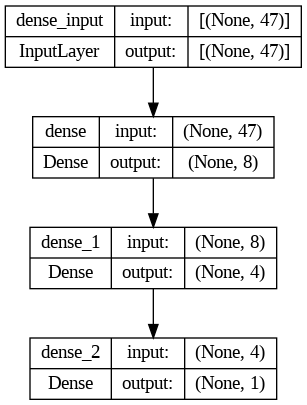

In [ ]:
# Plot layers
tf.keras.utils.plot_model(baseSequential, show_shapes = True)

### 6.1.2 Model Training

In [ ]:
# Train the base sequential
%%time
historyBaseSeq = baseSequential.fit(trainData,
                                    epochs = 25,
                                    validation_data = valData,)

Epoch 1/25
810/810 [==============================] - 7s 6ms/step - loss: 0.5891 - accuracy: 0.6961 - val_loss: 0.4708 - val_accuracy: 0.7963
Epoch 2/25
810/810 [==============================] - 3s 3ms/step - loss: 0.3617 - accuracy: 0.8373 - val_loss: 0.2947 - val_accuracy: 0.8605
Epoch 3/25
810/810 [==============================] - 4s 4ms/step - loss: 0.2870 - accuracy: 0.8564 - val_loss: 0.2673 - val_accuracy: 0.8664
Epoch 4/25
810/810 [==============================] - 4s 5ms/step - loss: 0.2732 - accuracy: 0.8587 - val_loss: 0.2610 - val_accuracy: 0.8711
Epoch 5/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.8647 - val_loss: 0.2561 - val_accuracy: 0.8762
Epoch 6/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2633 - accuracy: 0.8659 - val_loss: 0.2511 - val_accuracy: 0.8732
Epoch 7/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2608 - accuracy: 0.8659 - val_loss: 0.2491 - val_accuracy: 0.8753
Epoch 

### 6.1.3 Model Evaluation

In [ ]:
# Create dataframe
historyBaseSeqDF = pd.DataFrame(historyBaseSeq.history)
historyBaseSeqDF

,loss,accuracy,val_loss,val_accuracy
0,0.589101,0.696064,0.470835,0.796269
1,0.361678,0.837312,0.294694,0.860505
2,0.287006,0.856395,0.267327,0.866441
3,0.273195,0.858677,0.260976,0.871105
4,0.267036,0.864701,0.256090,0.876193
5,0.263331,0.865861,0.251062,0.873224
6,0.260762,0.865898,0.249100,0.875345
7,0.258910,0.868892,0.247990,0.890820
8,0.257587,0.872933,0.248635,0.882340
9,0.256618,0.875290,0.248614,0.880008


<Axes: >

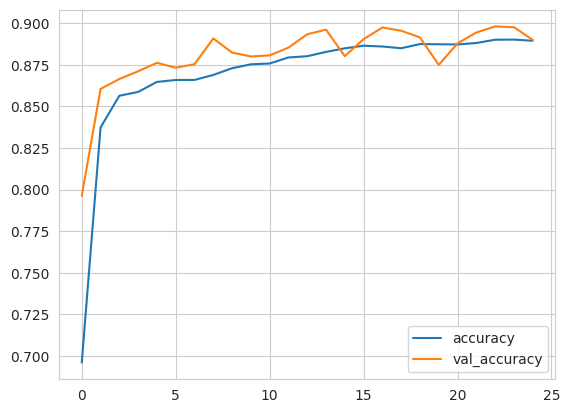

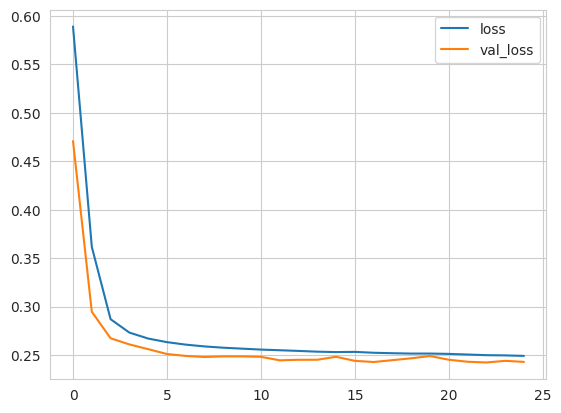

In [ ]:
# Plot training result
historyBaseSeqDF[['accuracy', 'val_accuracy']].plot()
historyBaseSeqDF[['loss', 'val_loss']].plot()

In [ ]:
# Base Seqential Model evaluation of test-set
y_predBaseSeq = baseSequential.predict(X_test)
y_predBaseSeq = np.where(y_predBaseSeq >= 0.5, 1, 0)

print(classification_report(y_test, y_predBaseSeq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2547
           1       0.93      0.86      0.89      3002

    accuracy                           0.89      5549
   macro avg       0.89      0.89      0.89      5549
weighted avg       0.89      0.89      0.89      5549



The model is still slightly over-fit where the recall value of the actual data drops by **6%.**

## 6.2 Functional Model

### 6.2.1 Model Definition

Create Base Functional API model with first 8 hidden layers, second 4 hidden layers, activation relu and Adam optimizer

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create base Functional Model
inputLayer = Input(shape=(47,))
hiddenLayer1 = Dense(8, activation='relu')(inputLayer)
hiddenLayer2 = Dense(4, activation='relu')(hiddenLayer1)

concateLayer = concatenate([inputLayer, hiddenLayer2])
outputLayer = Dense(1, activation='sigmoid')(concateLayer)

baseFunctional = Model(inputs = inputLayer, outputs=outputLayer)

# Compile
baseFunctional.compile(loss = 'binary_crossentropy',
                        optimizer = 'adam',
                        metrics = 'accuracy')

# Show the summary of model
baseFunctional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 47)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            384         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            36          ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 51)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

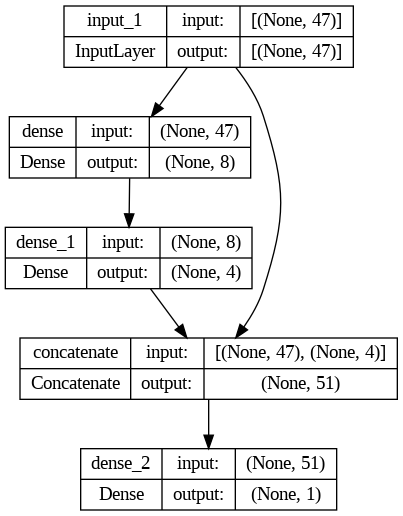

In [ ]:
# Plot Layer
tf.keras.utils.plot_model(baseFunctional, show_shapes=True)

### 6.2.2 Model Training

In [ ]:
# Train the base functional model
%%time
historyBaseFunc = baseFunctional.fit(trainData,
                                     epochs = 25,
                                     validation_data = valData)

Epoch 1/25
810/810 [==============================] - 3s 2ms/step - loss: 0.4546 - accuracy: 0.7418 - val_loss: 0.2550 - val_accuracy: 0.8607
Epoch 2/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.8626 - val_loss: 0.2474 - val_accuracy: 0.8694
Epoch 3/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2564 - accuracy: 0.8692 - val_loss: 0.2455 - val_accuracy: 0.8760
Epoch 4/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2533 - accuracy: 0.8747 - val_loss: 0.2432 - val_accuracy: 0.8876
Epoch 5/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2504 - accuracy: 0.8867 - val_loss: 0.2413 - val_accuracy: 0.8980
Epoch 6/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2484 - accuracy: 0.8943 - val_loss: 0.2421 - val_accuracy: 0.8936
Epoch 7/25
810/810 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.8973 - val_loss: 0.2439 - val_accuracy: 0.8792
Epoch 

### 6.2.3 Model Evaluation

In [ ]:
# Create dataframe
historyBaseFuncDF = pd.DataFrame(historyBaseFunc.history)
historyBaseFuncDF

,loss,accuracy,val_loss,val_accuracy
0,0.454580,0.741824,0.255032,0.860717
1,0.260322,0.862643,0.247433,0.869409
2,0.256448,0.869228,0.245491,0.875980
3,0.253308,0.874729,0.243205,0.887640
4,0.250442,0.886665,0.241305,0.898028
5,0.248372,0.894298,0.242134,0.893576
6,0.247587,0.897291,0.243923,0.879160
7,0.246609,0.903091,0.241681,0.908416
8,0.246028,0.902417,0.240869,0.909052
9,0.245454,0.901669,0.241786,0.896120


<Axes: >

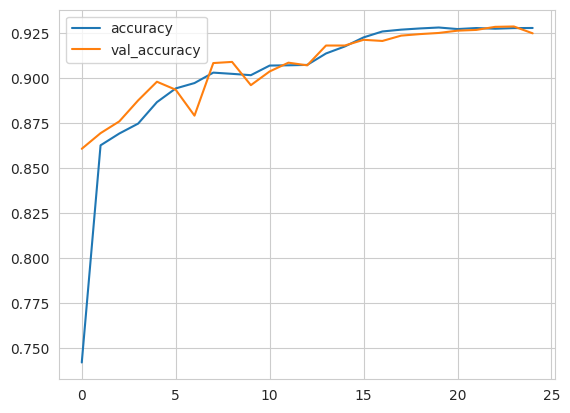

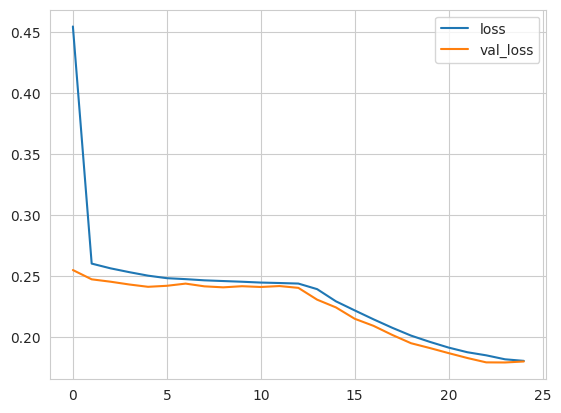

In [ ]:
# Plot training result
historyBaseFuncDF[['accuracy', 'val_accuracy']].plot()
historyBaseFuncDF[['loss', 'val_loss']].plot()

In [ ]:
# Base functional model evaluation of test-set
y_predBaseFunc = baseFunctional.predict(X_test)
y_predBaseFunc = np.where(y_predBaseFunc >= 0.5, 1, 0)

print(classification_report(y_test, y_predBaseFunc))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2547
           1       0.94      0.94      0.94      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.93      0.93      5549
weighted avg       0.93      0.93      0.93      5549



The model tends to be good-fit. Where the recall value against actual data increases by **1%.**

# **7 - Model Improvement**

---



The cells in this section only contain code to train the model and the resulting output. Perform several training processes with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

## 7.1 Sequential API Improvement

### 7.1.1 Model Definition

In this Sequential improvement, I used 16 first hidden layer, 8 second hidden layer and Batch Normalization with a momentum of 0.99 with the RMSProp optimizer.

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential Model Improvement
improveSequential = Sequential()
improveSequential.add(Dense(16, activation='relu', input_shape=(47,))) # first Hidden Layer
improveSequential.add(tf.keras.layers.BatchNormalization(momentum=0.99))
improveSequential.add(Dense(8, activation='relu', )) # second Hidden layer
improveSequential.add(tf.keras.layers.BatchNormalization(momentum=0.99))
improveSequential.add(Dense(1, activation='sigmoid')) # Output layer

# Compile 
improveSequential.compile(loss = 'binary_crossentropy',
                          optimizer = 'RMSProp',
                          metrics = ['accuracy'])

# Show summary the model
improveSequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                768       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,009
Trainable params: 961
Non-trainable 

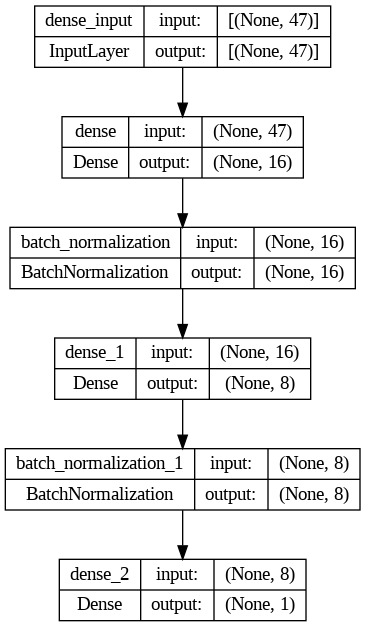

In [ ]:
# Plot layers sequential improvement
tf.keras.utils.plot_model(improveSequential, show_shapes = True)

### 7.1.2 Model Training

In [ ]:
# Train the model sequential improvement
%%time
historyImproveSeq = improveSequential.fit(trainData,
                                          epochs = 40, 
                                          validation_data = valData)

Epoch 1/40
810/810 [==============================] - 3s 3ms/step - loss: 0.3946 - accuracy: 0.8002 - val_loss: 0.2618 - val_accuracy: 0.8656
Epoch 2/40
810/810 [==============================] - 2s 2ms/step - loss: 0.2840 - accuracy: 0.8528 - val_loss: 0.2525 - val_accuracy: 0.8715
Epoch 3/40
810/810 [==============================] - 2s 2ms/step - loss: 0.2770 - accuracy: 0.8607 - val_loss: 0.2449 - val_accuracy: 0.8936
Epoch 4/40
810/810 [==============================] - 3s 3ms/step - loss: 0.2585 - accuracy: 0.8808 - val_loss: 0.2219 - val_accuracy: 0.9173
Epoch 5/40
810/810 [==============================] - 2s 2ms/step - loss: 0.2295 - accuracy: 0.9112 - val_loss: 0.2023 - val_accuracy: 0.9207
Epoch 6/40
810/810 [==============================] - 2s 2ms/step - loss: 0.2120 - accuracy: 0.9176 - val_loss: 0.1904 - val_accuracy: 0.9207
Epoch 7/40
810/810 [==============================] - 2s 2ms/step - loss: 0.2086 - accuracy: 0.9201 - val_loss: 0.1910 - val_accuracy: 0.9205
Epoch 

### 7.1.2 Model Evaluation

In [ ]:
# Create dataframe for sequential improvement
historyImproveSeqDF = pd.DataFrame(historyImproveSeq.history)
historyImproveSeqDF

,loss,accuracy,val_loss,val_accuracy
0,0.394554,0.800232,0.261813,0.865593
1,0.284046,0.852840,0.252535,0.871529
2,0.276970,0.860697,0.244902,0.893576
3,0.258493,0.880828,0.221872,0.917320
4,0.229512,0.911173,0.202256,0.920712
5,0.212009,0.917646,0.190367,0.920712
6,0.208599,0.920115,0.190972,0.920500
7,0.203556,0.921238,0.185027,0.923044
8,0.199903,0.923333,0.175052,0.923044
9,0.199679,0.923819,0.176954,0.924316


<Figure size 2000x1500 with 0 Axes>

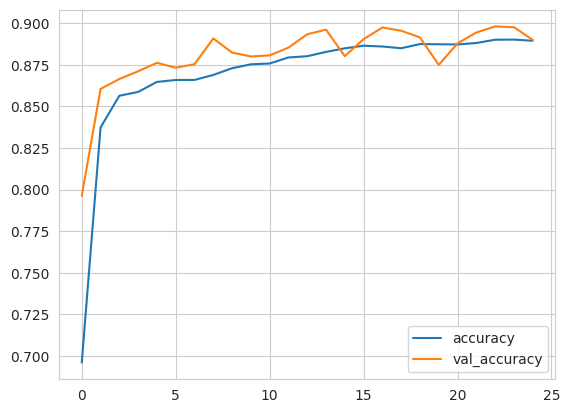

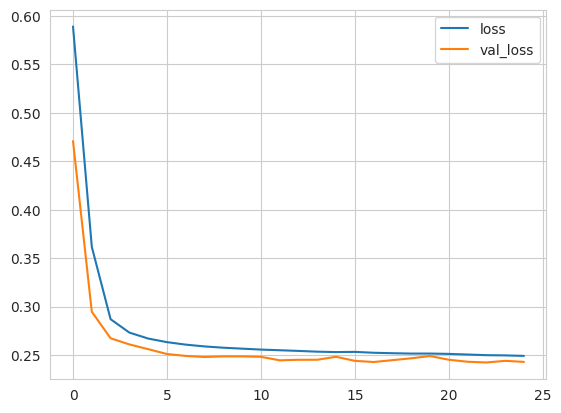

In [ ]:
# Plot training result
plt.figure(figsize=(20,15))
historyBaseSeqDF[['accuracy', 'val_accuracy']].plot()
historyBaseSeqDF[['loss', 'val_loss']].plot()
plt.show()

In [ ]:
# Improvement Model evaluation of test-set
y_predImproveSeq = improveSequential.predict(X_test)
y_predImproveSeq = np.where(y_predImproveSeq >= 0.5, 1, 0)

print(classification_report(y_test, y_predImproveSeq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2547
           1       0.94      0.93      0.93      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.93      0.93      5549
weighted avg       0.93      0.93      0.93      5549



By using the improvements described above, this model tends to be a good fit. With the loss and val_loss values in the range of **0.16 - 0.17** with recall values that tend to stagnate.

## 7.2 Functional API Improvement

### 7.2.1 Model Definition

In this Functional improvement, I used 16 first hidden layer, 8 second hidden layer and Batch Normalization with nadam optimizer and set the threshold at 0.6.

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create improve Functional Model
inputLayer = Input(shape=(47,))
hiddenLayer1 = Dense(16, activation='relu')(inputLayer)
hiddenLayer1 = tf.keras.layers.BatchNormalization()(inputLayer)
hiddenLayer2 = Dense(8, activation='relu')(hiddenLayer1)
hiddenLayer2 = tf.keras.layers.BatchNormalization()(hiddenLayer1)

concateLayer = concatenate([inputLayer, hiddenLayer2])
outputLayer = Dense(1, activation='sigmoid')(concateLayer)

improveFunctional = Model(inputs = inputLayer, outputs=outputLayer)

# Compile
improveFunctional.compile(loss = 'binary_crossentropy',
                        optimizer = 'nadam',
                        metrics = [tf.keras.metrics.BinaryAccuracy(threshold=.6)])

# Show the summary of model
improveFunctional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 47)]         0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 47)          188         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 47)          188         ['batch_normalization[0][0]']    
 rmalization)                                                                                     
                                                                                              

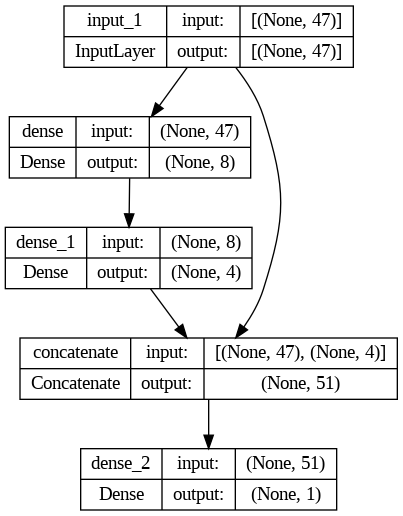

In [ ]:
# Plot Layer
tf.keras.utils.plot_model(baseFunctional, show_shapes=True)

### 7.2.2 Model Training

In [ ]:
# Train the improve functional model
%%time
historyImproveFunc = improveFunctional.fit(trainData, 
                                           epochs = 40, 
                                           validation_data = valData)

Epoch 1/40
810/810 [==============================] - 4s 3ms/step - loss: 0.4919 - binary_accuracy: 0.7493 - val_loss: 0.2918 - val_binary_accuracy: 0.8548
Epoch 2/40
810/810 [==============================] - 3s 3ms/step - loss: 0.2854 - binary_accuracy: 0.8519 - val_loss: 0.2528 - val_binary_accuracy: 0.8535
Epoch 3/40
810/810 [==============================] - 2s 3ms/step - loss: 0.2686 - binary_accuracy: 0.8513 - val_loss: 0.2503 - val_binary_accuracy: 0.8554
Epoch 4/40
810/810 [==============================] - 2s 3ms/step - loss: 0.2684 - binary_accuracy: 0.8506 - val_loss: 0.2485 - val_binary_accuracy: 0.8558
Epoch 5/40
810/810 [==============================] - 2s 3ms/step - loss: 0.2648 - binary_accuracy: 0.8521 - val_loss: 0.2490 - val_binary_accuracy: 0.8567
Epoch 6/40
810/810 [==============================] - 2s 3ms/step - loss: 0.2656 - binary_accuracy: 0.8537 - val_loss: 0.2476 - val_binary_accuracy: 0.8552
Epoch 7/40
810/810 [==============================] - 3s 4ms/ste

### 7.2.3 Model Evaluation

In [ ]:
# Create dataframe for functional improvement
historyImproveFuncDF = pd.DataFrame(historyImproveFunc.history)
historyImproveFuncDF

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.491941,0.749270,0.291759,0.854781
1,0.285364,0.851905,0.252783,0.853509
2,0.268618,0.851268,0.250299,0.855417
3,0.268391,0.850558,0.248471,0.855841
4,0.264848,0.852129,0.249027,0.856689
5,0.265571,0.853701,0.247570,0.855205
6,0.265100,0.853364,0.246531,0.852237
7,0.266252,0.850408,0.249335,0.856901
8,0.263583,0.850520,0.247934,0.855841
9,0.265732,0.850445,0.247606,0.854781


<Axes: >

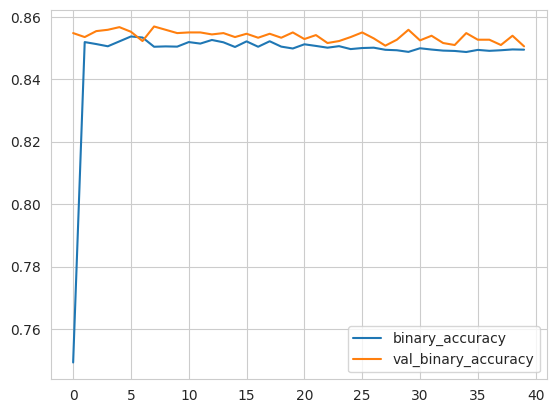

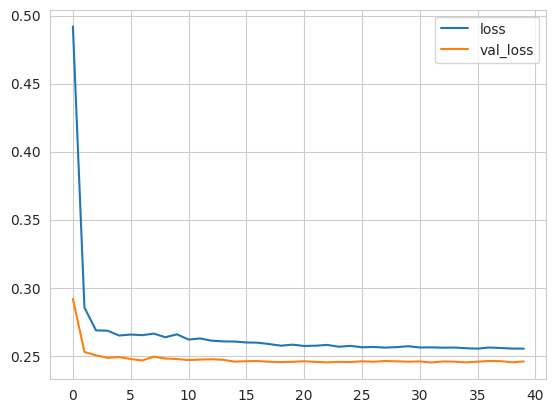

In [ ]:
# Plot training result for functional improvement
historyImproveFuncDF[['binary_accuracy', 'val_binary_accuracy']].plot()
historyImproveFuncDF[['loss', 'val_loss']].plot()

In [ ]:
# Model evaluation of test-set for functional improvement
y_predImproveFunc = improveFunctional.predict(X_test)
y_predImproveFunc = np.where(y_predImproveFunc >= 0.5, 1, 0)

print(classification_report(y_test, y_predImproveFunc))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2547
           1       0.92      0.81      0.86      3002

    accuracy                           0.86      5549
   macro avg       0.86      0.86      0.86      5549
weighted avg       0.87      0.86      0.86      5549



By using the improvements described above, this functional improvement model tends to overfit. because the difference between loss and val_los is still quite large. And the recall value that drops against the actual data

# **8 - Model Evaluation**

---

In this section, the model evaluation should show how the model performs based on the selected metrics. This should be evidenced by visualization of performance trends and/or model error rates. Analyze the results of the model and write down the results of the analysis.

## 8.1 Evaluate Model with Classification Report

In [ ]:
# Evaluate model with classification report
%%time
print('='*65)
# Display classification report for Base Sequential
print('Classification Report - Base Sequential : ')
print(classification_report(y_test, y_predBaseSeq))
print('='*65)
# Display classification report for Improvement Sequential
print('Classification Report - Improve Sequential : ')
print(classification_report(y_test, y_predImproveSeq))
print('='*65)
# Display classification report for Base Functional
print('Classification Report - Base Functional : ')
print(classification_report(y_test, y_predBaseFunc))
print('='*65)
# Display classification report for Improvement Functional
print('Classification Report - Improve Functional : ')
print(classification_report(y_test, y_predImproveFunc))
print('='*65)

Classification Report - Base Sequential : 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2547
           1       0.93      0.86      0.89      3002

    accuracy                           0.89      5549
   macro avg       0.89      0.89      0.89      5549
weighted avg       0.89      0.89      0.89      5549

Classification Report - Improve Sequential : 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2547
           1       0.94      0.93      0.93      3002

    accuracy                           0.93      5549
   macro avg       0.93      0.93      0.93      5549
weighted avg       0.93      0.93      0.93      5549

Classification Report - Base Functional : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2547
           1       0.94      0.94      0.94      3002

    accuracy                           0.93      5

From the classification report above by emphasizing the Recall value to reduce False Negative, it can be concluded:

1. Score Recall on base sequential fair enough at 86%
2. Score Recall on the Sequential Improvement model increased 7% compared to the Sequential base model. It happen because we've declare the another optimizer in the model sequential improvement
3. Score Recall in the Functional Improvement model decreased compared to the Functional base model.
4. Overall, the base Functional model is the best model compared to other

## 8.2 Evaluate Model with Confusion Matrix

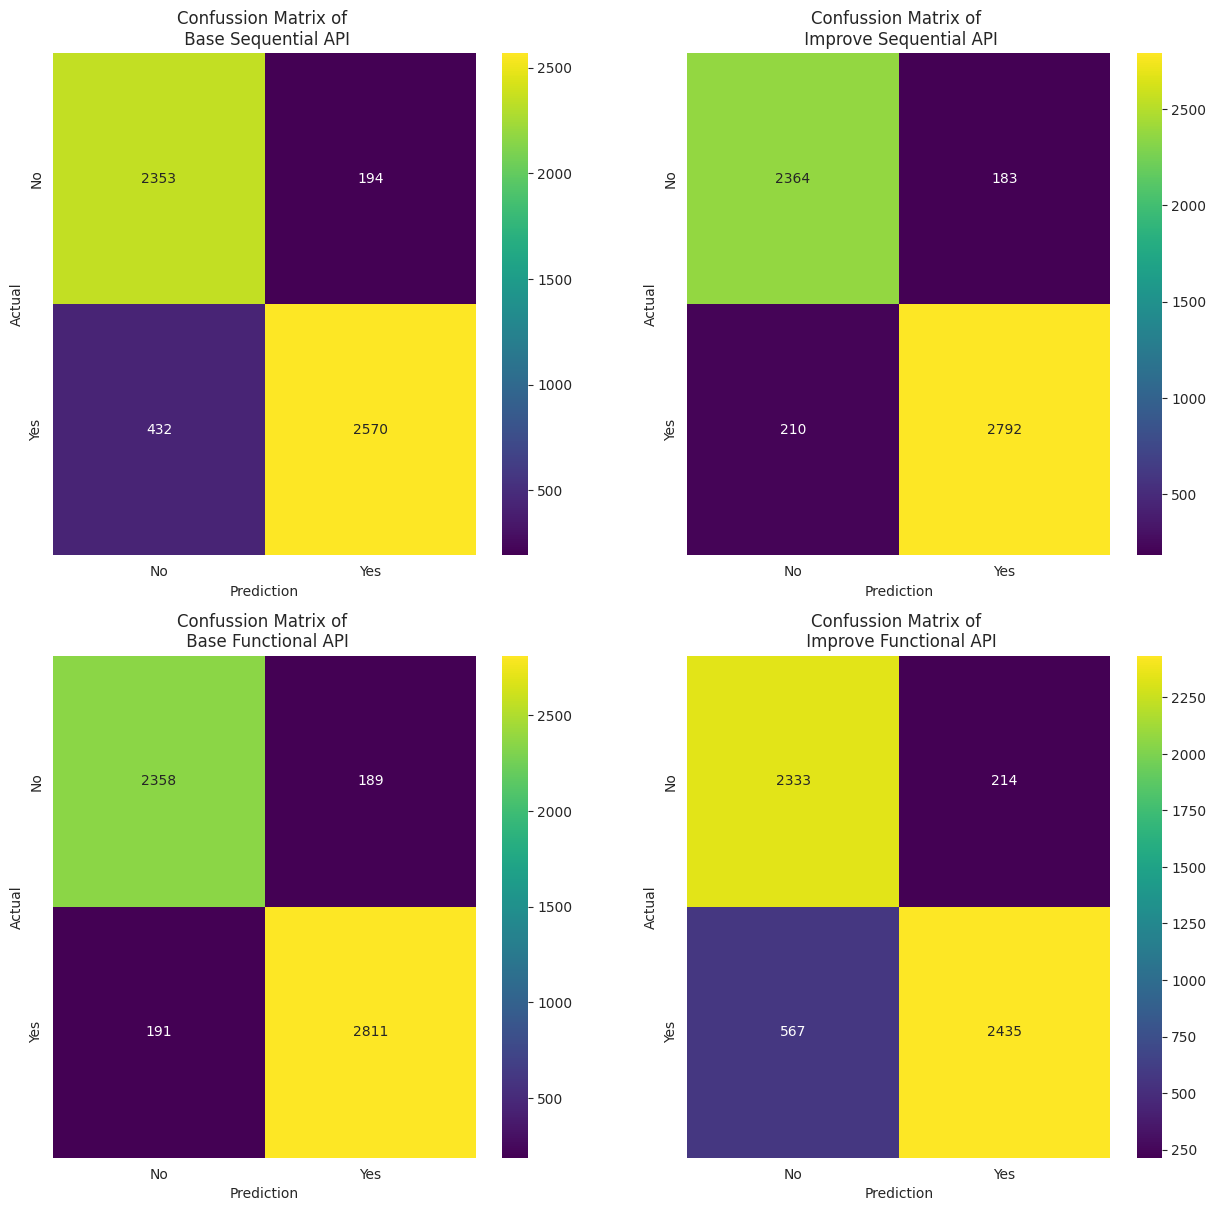

CPU times: user 1.29 s, sys: 126 ms, total: 1.42 s
Wall time: 1.33 s


In [ ]:
# Evaluate model with confussion matrix
%%time
modelCM = [confusion_matrix(y_test, y_predBaseSeq),
           confusion_matrix(y_test, y_predImproveSeq),
           confusion_matrix(y_test, y_predBaseFunc),
           confusion_matrix(y_test, y_predImproveFunc),]

modelAlias = ['Base Sequential API', 'Improve Sequential API',
              'Base Functional API', 'Improve Functional API']

# Confussion matrix
plt.figure(figsize = (15, 30))
for i in range(len(modelCM)):
  plt.subplot(4, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot=True, fmt = 'd', cmap = 'viridis')
  plt.title(f'Confussion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
plt.show()

In the Confusion matrix above, it can be concluded:

1. False Negative is a model error in predicting customers do not churn but the actual case is the opposite.
2. False Negative in Base Sequential is still 1.5% of the total data, while in Sequential improvement it drops to 0.75% of the total data. This is quite good considering that here we minimize the existence of False Negative.
3. False Negative in Base Functional is 0.69% of the total data, while in Improvement Functional it increases to 2.05% of the total data. This should be avoided because the model mispredicts the False Negative.

## 8.3 Conclusion Model

In [ ]:
# Freeze the base Functional model
baseFunctional.trainable = False
baseFunctional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 47)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            384         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            36          ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 51)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

Based on the evaluation using the classification report and confusion matrix, I decided to use the base Functional Model using the first 8 hidden layers, the second 4 hidden layers and using Activation Relu and Adam's Optimizer to be used in the Inference model.

# **9 - Model Saving**

---


In [ ]:
# Saving the model
# Pipeline saving
with open('FinalPipeline.pkl', 'wb') as file1:
  pickle.dump(finalPipeline, file1)

# Model ANN Saving
baseFunctional.save('churnModel.h5')

In this section, I save the selected model which is base **Functional API** for later use in the deployment model.

# **10 - Model Inference**

---

The trained model will be tested on data that is not included in the train-set or test-set. This data must be in its original format, not scaled data.

In [ ]:
# Get data inferences
infData = data.sample(25, random_state=19)

# Reset index
infData = infData.reset_index()

# Drop column index
infData.drop(columns=['index', 'user_id', 'gender', 'joined_through_referral', 
                      'last_visit_time', 'internet_option'], axis=1, inplace=True)

# Display
infData

,age,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,13,Town,Gold Membership,2015-07-10,Without Offers,Desktop,11,127.010000,39377.19,13.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
1,22,City,Premium Membership,2016-02-13,Without Offers,Smartphone,8,157.310000,31413.71,14.000000,787.530000,Yes,No,Yes,Solved in Follow-up,Poor Website,0
2,60,Town,Basic Membership,2017-01-02,Credit/Debit Card Offers,Desktop,11,32.350000,8874.72,9.000000,686.520000,Yes,No,Yes,Solved in Follow-up,Poor Website,1
3,35,NaN,Gold Membership,2016-04-22,Gift Vouchers/Coupons,NaN,13,267.500000,40934.07,16.000000,689.620000,No,Yes,No,Not Applicable,Poor Website,1
4,11,NaN,No Membership,2017-05-05,Gift Vouchers/Coupons,Smartphone,14,140.270000,10519.70,9.000000,620.340000,No,Yes,No,Not Applicable,Poor Product Quality,1
5,28,Town,Silver Membership,2017-12-13,Credit/Debit Card Offers,Desktop,9,34.230000,12904.43,0.000000,609.330000,Yes,No,No,Not Applicable,Too many ads,1
6,38,NaN,Basic Membership,2016-10-26,Gift Vouchers/Coupons,Desktop,11,153.120000,48097.62,25.000000,699.230000,Yes,No,No,Not Applicable,Poor Product Quality,1
7,50,NaN,Gold Membership,2017-01-29,Credit/Debit Card Offers,Smartphone,10,274.560000,47783.65,29.000000,0.000000,Yes,No,No,Not Applicable,Poor Website,1
8,44,Village,Basic Membership,2016-11-21,Gift Vouchers/Coupons,Desktop,24,33.580000,25342.74,9.000000,595.510000,Yes,No,No,Not Applicable,No reason specified,1
9,23,City,No Membership,2015-01-27,Credit/Debit Card Offers,NaN,-999,142.610000,5368.41,0.000000,638.200000,Yes,No,No,Not Applicable,Poor Customer Service,1


In [ ]:
# Data age binning
criteria = [
    (infData['age'] >= 8) & (infData['age'] < 20),
    (infData['age'] >= 20) & (infData['age'] < 30),
    (infData['age'] >= 30) & (infData['age'] < 40),
    (infData['age'] >= 40) & (infData['age'] < 50),
    (infData['age'] >= 50) & (infData['age'] < 60),
    (infData['age'] >= 60)
]

binLabels = ['under20', 'under30', 'under40', 'under50', 'under60', 'above60']

infData['age_bin'] = pd.cut(infData['age'], bins=[9, 20, 29, 39, 49, 59, float('inf')], labels=binLabels)

# Get Year of join from column joining date
# Change to datetim
infData['joining_date'] = pd.to_datetime(infData['joining_date'])

# Get year only
infData['joining_year'] = infData['joining_date'].dt.year

# Drop columns age and joining date
infData.drop(columns=['age', 'joining_date'], axis=1, inplace=True)

# Display
infData

,region_category,membership_category,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_bin,joining_year
0,Town,Gold Membership,Without Offers,Desktop,11,127.010000,39377.19,13.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1,under20,2015
1,City,Premium Membership,Without Offers,Smartphone,8,157.310000,31413.71,14.000000,787.530000,Yes,No,Yes,Solved in Follow-up,Poor Website,0,under30,2016
2,Town,Basic Membership,Credit/Debit Card Offers,Desktop,11,32.350000,8874.72,9.000000,686.520000,Yes,No,Yes,Solved in Follow-up,Poor Website,1,above60,2017
3,NaN,Gold Membership,Gift Vouchers/Coupons,NaN,13,267.500000,40934.07,16.000000,689.620000,No,Yes,No,Not Applicable,Poor Website,1,under40,2016
4,NaN,No Membership,Gift Vouchers/Coupons,Smartphone,14,140.270000,10519.70,9.000000,620.340000,No,Yes,No,Not Applicable,Poor Product Quality,1,under20,2017
5,Town,Silver Membership,Credit/Debit Card Offers,Desktop,9,34.230000,12904.43,0.000000,609.330000,Yes,No,No,Not Applicable,Too many ads,1,under30,2017
6,NaN,Basic Membership,Gift Vouchers/Coupons,Desktop,11,153.120000,48097.62,25.000000,699.230000,Yes,No,No,Not Applicable,Poor Product Quality,1,under40,2016
7,NaN,Gold Membership,Credit/Debit Card Offers,Smartphone,10,274.560000,47783.65,29.000000,0.000000,Yes,No,No,Not Applicable,Poor Website,1,under60,2017
8,Village,Basic Membership,Gift Vouchers/Coupons,Desktop,24,33.580000,25342.74,9.000000,595.510000,Yes,No,No,Not Applicable,No reason specified,1,under50,2016
9,City,No Membership,Credit/Debit Card Offers,NaN,-999,142.610000,5368.41,0.000000,638.200000,Yes,No,No,Not Applicable,Poor Customer Service,1,under30,2015


In [ ]:
# Fill in missing data with `Village` in region_category
infData['region_category'] = infData['region_category'].fillna('Village')

# Fill in missing data with 'Both' in medium_of_operation base on my assumsion
# where the customer had a both medium_of_operation to enjoy the services
infData['medium_of_operation'] = infData['medium_of_operation'].fillna('Both')

In [ ]:
# Create a pipeline for infData
infPipe = finalPipeline.transform(infData)

# Display
infPipe

array([[ 0.23207698, -0.45888064,  0.52415353, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21900776, -0.36717151,  0.11143816, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23207698, -0.74538843, -1.05666771, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.22336417, -0.45585394,  0.00864283, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.27999748, -0.57095948, -0.59506486, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.21465135,  0.64813629, -0.79060801, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
# Applying the model
predInfData = baseFunctional.predict(infPipe)
predInfData = np.where(predInfData >= 0.5, 1, 0)

1/1 [==============================] - 0s 31ms/step


In [ ]:
# Save data predict into dataframe
predInfDataDF = pd.DataFrame(predInfData, columns=['churn_predict'])

# Concate data
infDataFinalDF = pd.concat([infData, predInfDataDF], axis=1)

# Display
infDataFinalDF

,region_category,membership_category,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_bin,joining_year,churn_predict
0,Town,Gold Membership,Without Offers,Desktop,11,127.010000,39377.19,13.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1,under20,2015,0
1,City,Premium Membership,Without Offers,Smartphone,8,157.310000,31413.71,14.000000,787.530000,Yes,No,Yes,Solved in Follow-up,Poor Website,0,under30,2016,0
2,Town,Basic Membership,Credit/Debit Card Offers,Desktop,11,32.350000,8874.72,9.000000,686.520000,Yes,No,Yes,Solved in Follow-up,Poor Website,1,above60,2017,1
3,Village,Gold Membership,Gift Vouchers/Coupons,Both,13,267.500000,40934.07,16.000000,689.620000,No,Yes,No,Not Applicable,Poor Website,1,under40,2016,1
4,Village,No Membership,Gift Vouchers/Coupons,Smartphone,14,140.270000,10519.70,9.000000,620.340000,No,Yes,No,Not Applicable,Poor Product Quality,1,under20,2017,1
5,Town,Silver Membership,Credit/Debit Card Offers,Desktop,9,34.230000,12904.43,0.000000,609.330000,Yes,No,No,Not Applicable,Too many ads,1,under30,2017,1
6,Village,Basic Membership,Gift Vouchers/Coupons,Desktop,11,153.120000,48097.62,25.000000,699.230000,Yes,No,No,Not Applicable,Poor Product Quality,1,under40,2016,1
7,Village,Gold Membership,Credit/Debit Card Offers,Smartphone,10,274.560000,47783.65,29.000000,0.000000,Yes,No,No,Not Applicable,Poor Website,1,under60,2017,0
8,Village,Basic Membership,Gift Vouchers/Coupons,Desktop,24,33.580000,25342.74,9.000000,595.510000,Yes,No,No,Not Applicable,No reason specified,1,under50,2016,1
9,City,No Membership,Credit/Debit Card Offers,Both,-999,142.610000,5368.41,0.000000,638.200000,Yes,No,No,Not Applicable,Poor Customer Service,1,under30,2015,1


This is concate data between data inference and data prediction

####################################################################################################
1    16
0     9
Name: churn_risk_score, dtype: int64
####################################################################################################


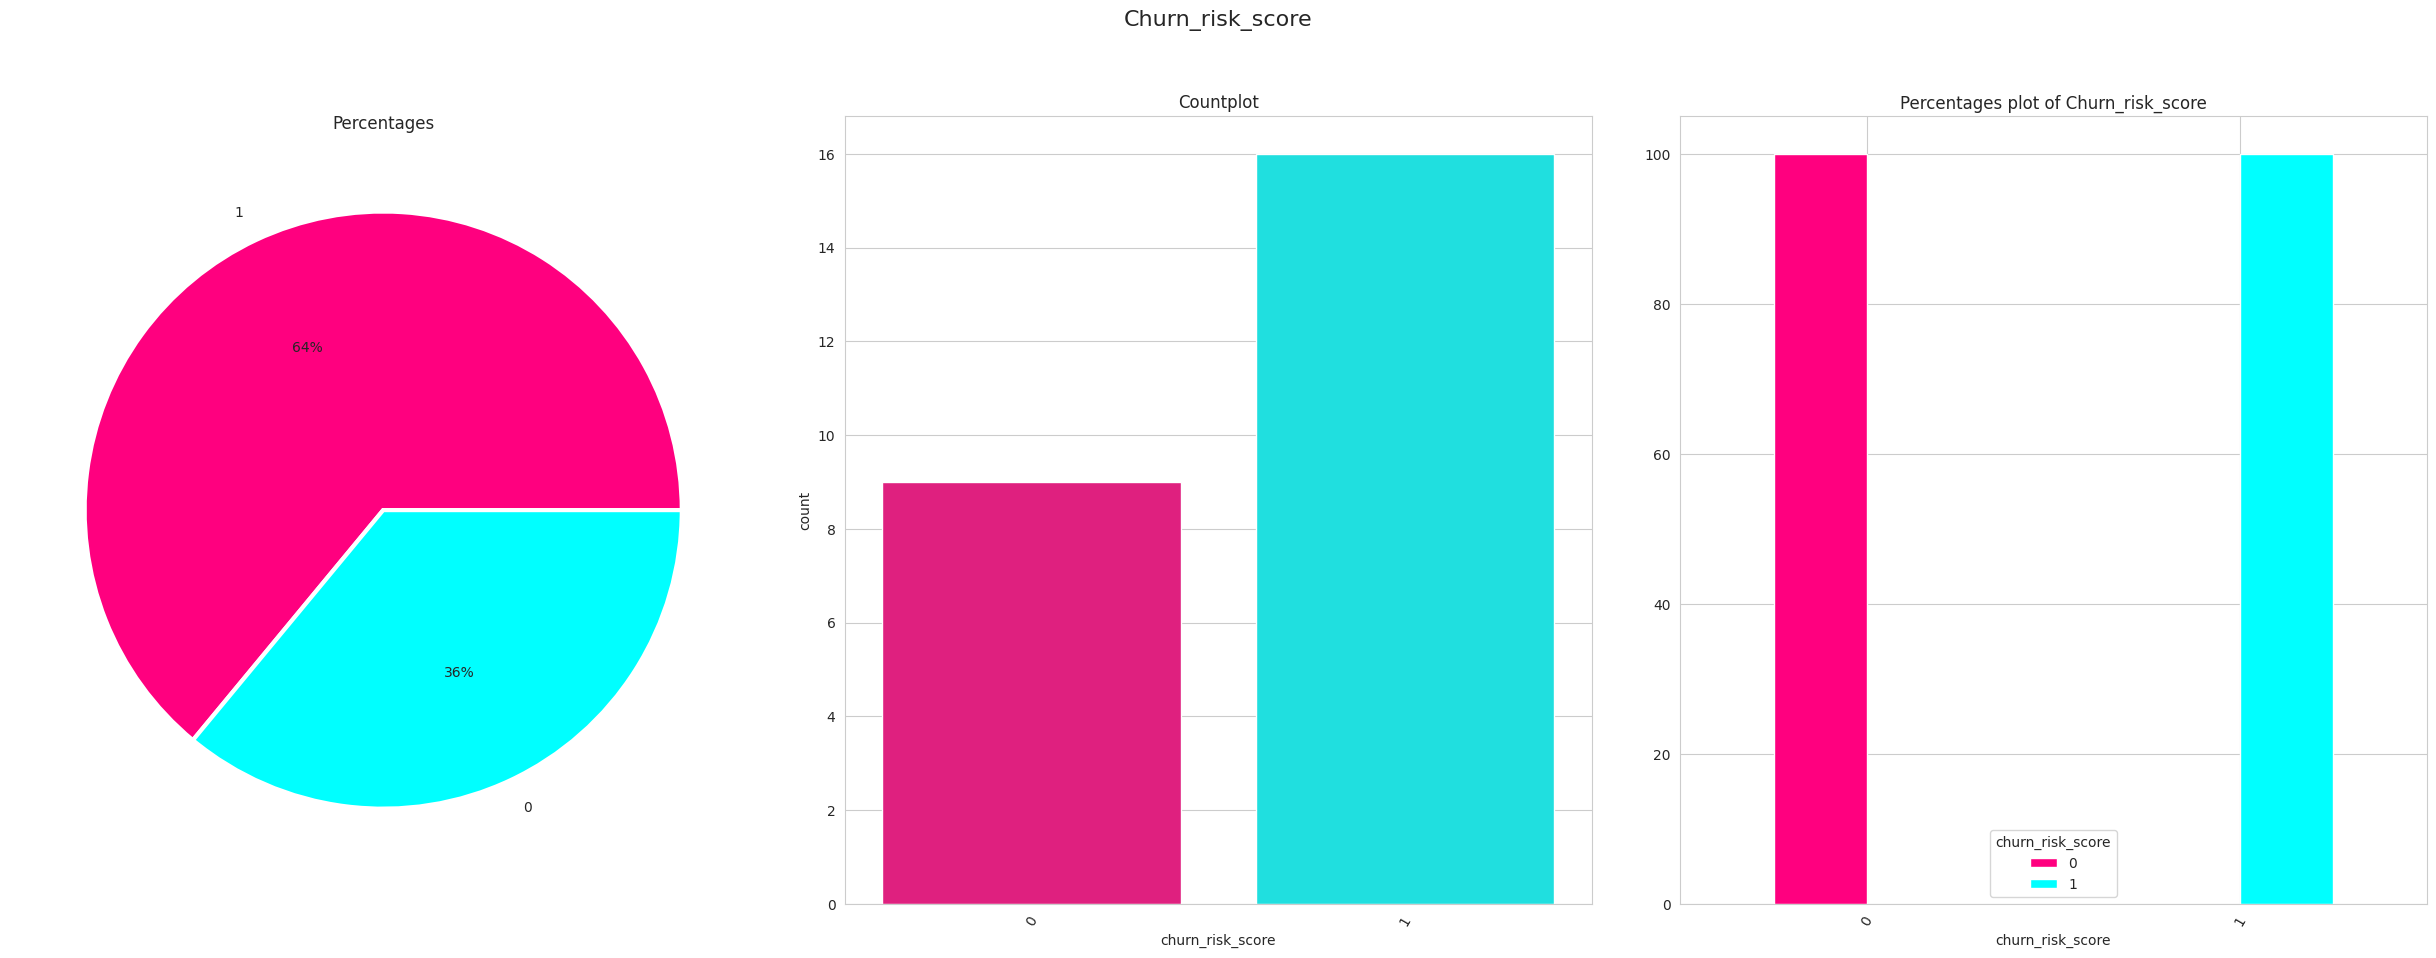

####################################################################################################
1    15
0    10
Name: churn_predict, dtype: int64
####################################################################################################


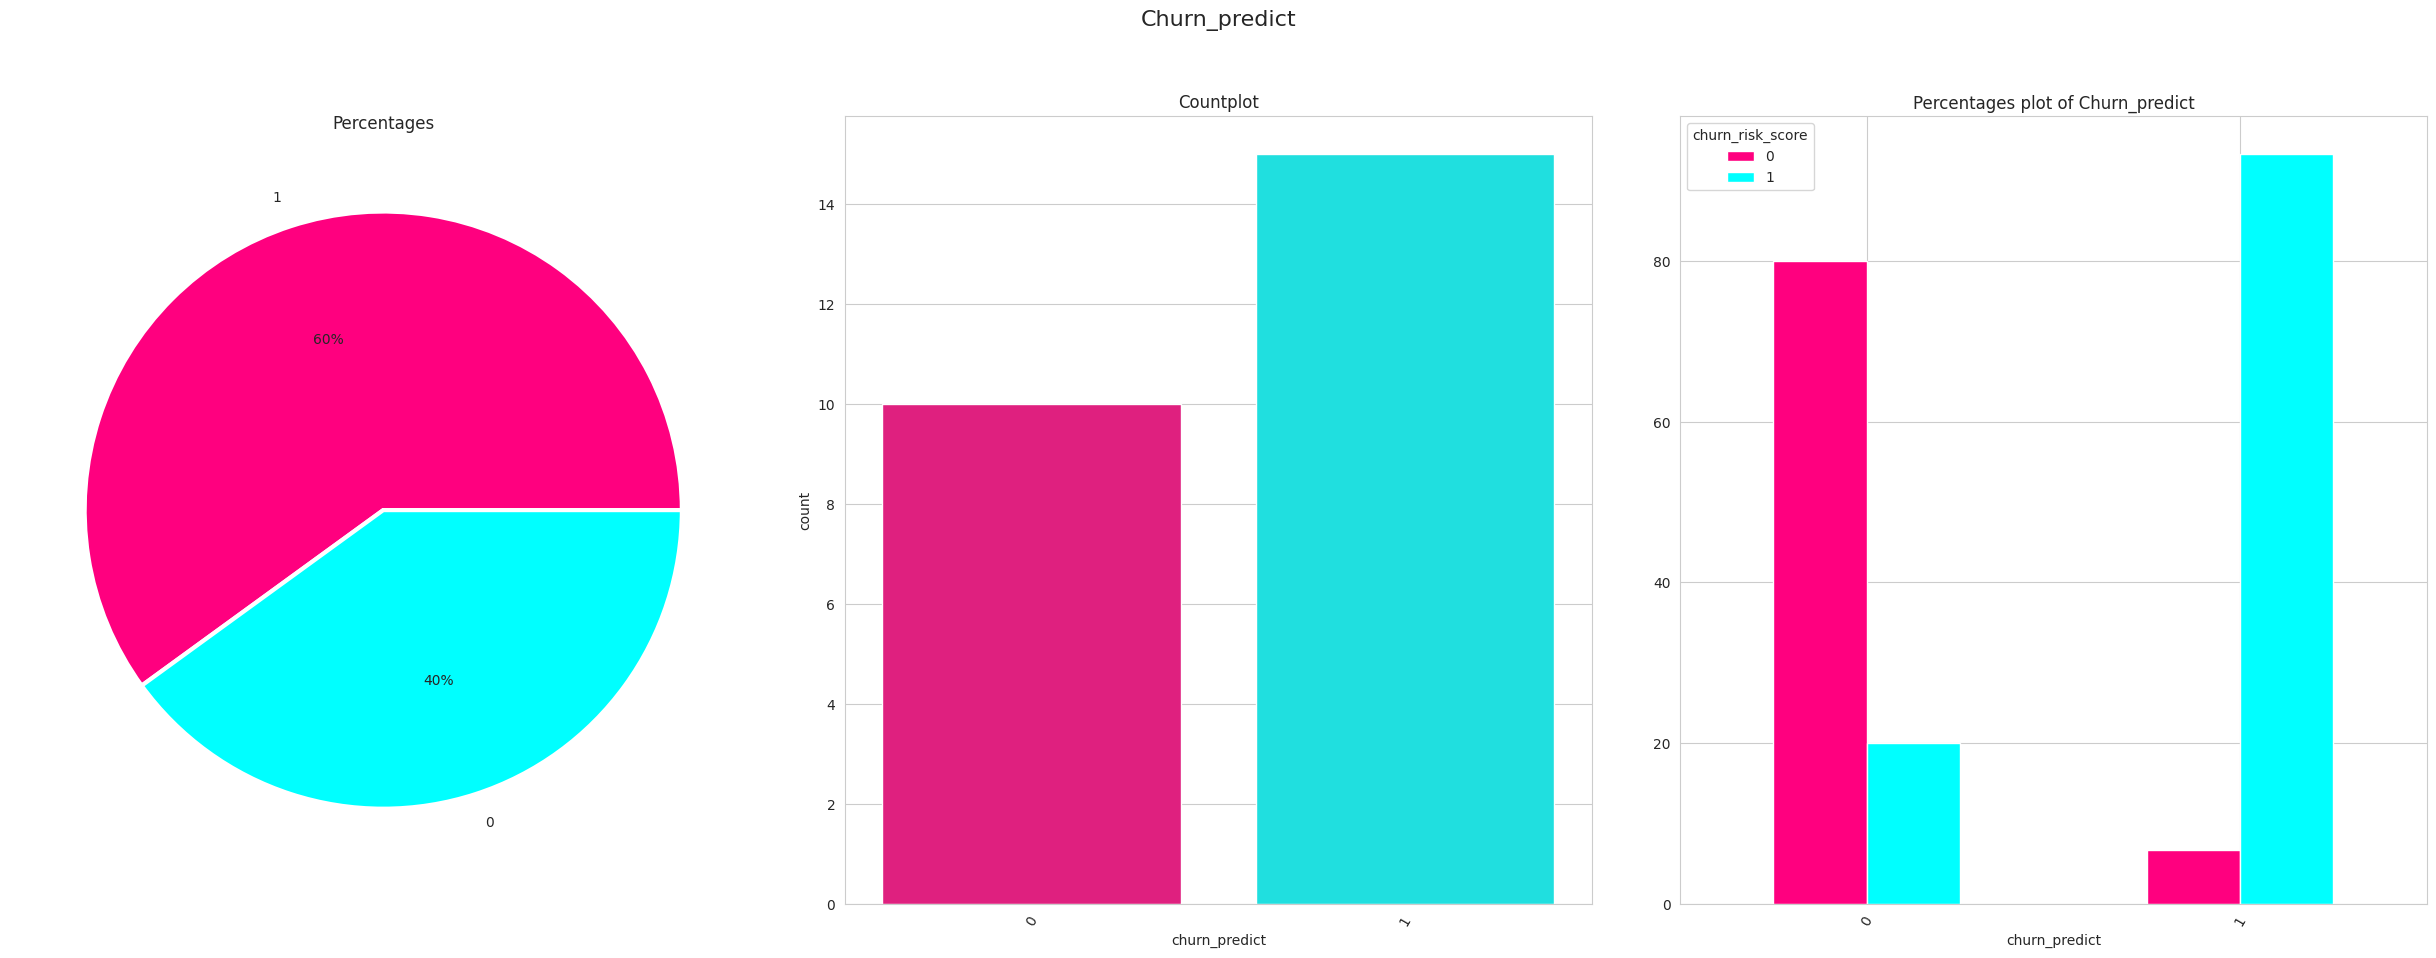

In [ ]:
# Infografis churn actual vs prediction
infoUser = ['churn_risk_score', 'churn_predict']
for col in infoUser:
    infographic(infDataFinalDF, col, "gender")

Here is the comparison data of actual churn with prediction. It can be seen that for the prediction of churn the model only makes one data error against the actual, where the comparison of actual churn with predictions is 64% versus 60%.

In [ ]:
# Check data prediction vs actual
print('Data Churn Actual  : ', infDataFinalDF.churn_risk_score.sum())
print('Data Churn Predict : ', infDataFinalDF.churn_predict.sum())

Data Churn Actual  :  16
Data Churn Predict :  15


It can be seen that the model only mispredicts 1 data. This is quite good because the model almost predicts the data well and helps the company to take preventive steps so that these customers remain subscribed.

# **11 - Conclusion**

---


In this last section, it should contain conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

1. The model used for deployment is the base **Functional API** with 8 first hidden layers, 4 second hidden layers, Optimizer Adam and Activation Relu.
2. It is not always the case that models that are improved by using other parameters perform better than the Base Model.
3. Customers with No Membership and Basic Membership are the largest categories of customers, but the risk of churn from these two customers is quite high. This needs a little attention so that the company can get additional benefits by attracting these types of customers to membership or move up to the next membership level by providing certain rewards to make them more interested.
4. Regarding customer complaints, the company should be able to handle them better. Because it is feared that if the complaints submitted are not responded to, this can cause customers to be disappointed and stop their subscriptions.
5. The chosen model, namely the base **Functional API**, shows good performance, where this model is able to provide low prediction error tolerance.